<a href="https://colab.research.google.com/github/ykitaguchi77/Instance_segmentation/blob/main/MPLD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MPLD analysis**

In [ ]:
# prompt: gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
detect_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/295+cerebhq1-20000_yolo11l.pt"
seg_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/eyelid_caruncle_yolo11seg_1-139.pt"
obb_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/yolo11n_obb_1-295_1to139.pt"

In [ ]:
image_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_test_images/Control_adult/1000.jpg"

In [ ]:
!pip install ultralytics --q
!pip install japanize-matplotlib --q
import japanize_matplotlib # インポートするだけで日本語対応が改善されます

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Detection model '/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/295+cerebhq1-20000_yolo11l.pt' loaded successfully.
Image '/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_test_images/退行性眼瞼下垂/1065-20150514-73-130021_f6728a8d37efcf237c38e21309bb4ec7535a838429b7448eddfcc2b1fcc17e68.jpg' loaded successfully. Dimensions: 2304x1536


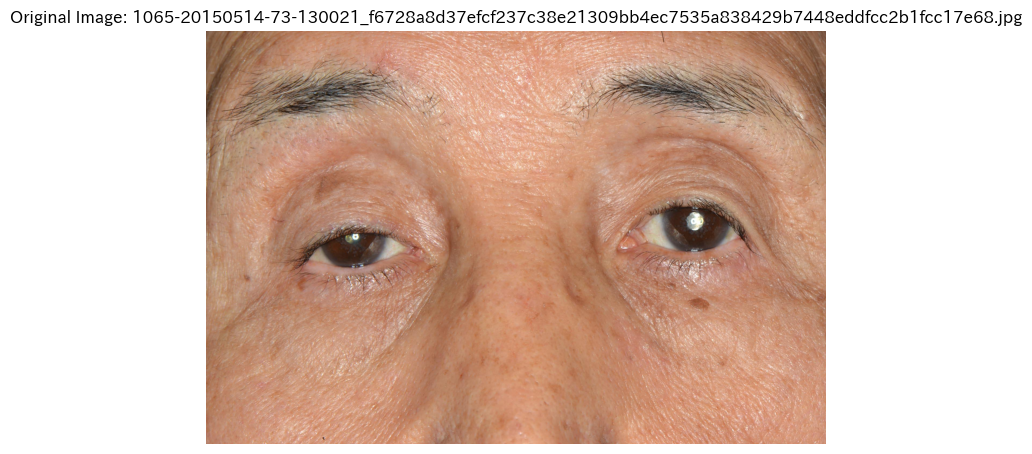

Original image '1065-20150514-73-130021_f6728a8d37efcf237c38e21309bb4ec7535a838429b7448eddfcc2b1fcc17e68.jpg' displayed.
Running detection model...
Detection complete.
2 個のバウンディングボックスが見つかりました。

BBox 1 処理中: Class='Left_eye', Side='L'
  元のBBox座標 (detect_model): x1=1526, y1=651, x2=1994, y2=819
  計算されたBBoxの幅/高さ: 幅=468, 高さ=168
  目標とする新しいクロップサイズ: 幅=702, 高さ=702
  理想のクロップウィンドウ座標: x1'1409, y1'384, x2'2111, y2'1086
  元画像から実際に切り取る範囲(slice): x1=1409, y1=384, x2=2111, y2=1086
  元画像から切り出した部分(img_slice)のShape: (702, 702, 3)
  img_slice に適用する最終パディング量: L=0, T=0, R=0, B=0
  パディング適用後のShape: (702, 702, 3)
  クロップ画像 1 (Side: L) を生成しました。Shape: (702, 702)

BBox 2 処理中: Class='Right_eye', Side='R'
  元のBBox座標 (detect_model): x1=372, y1=748, x2=803, y2=879
  計算されたBBoxの幅/高さ: 幅=431, 高さ=131
  目標とする新しいクロップサイズ: 幅=646, 高さ=646
  理想のクロップウィンドウ座標: x1'264, y1'490, x2'910, y2'1136
  元画像から実際に切り取る範囲(slice): x1=264, y1=490, x2=910, y2=1136
  元画像から切り出した部分(img_slice)のShape: (646, 646, 3)
  img_slice に適用する最終パディング量: L=0, T=0, R=0,

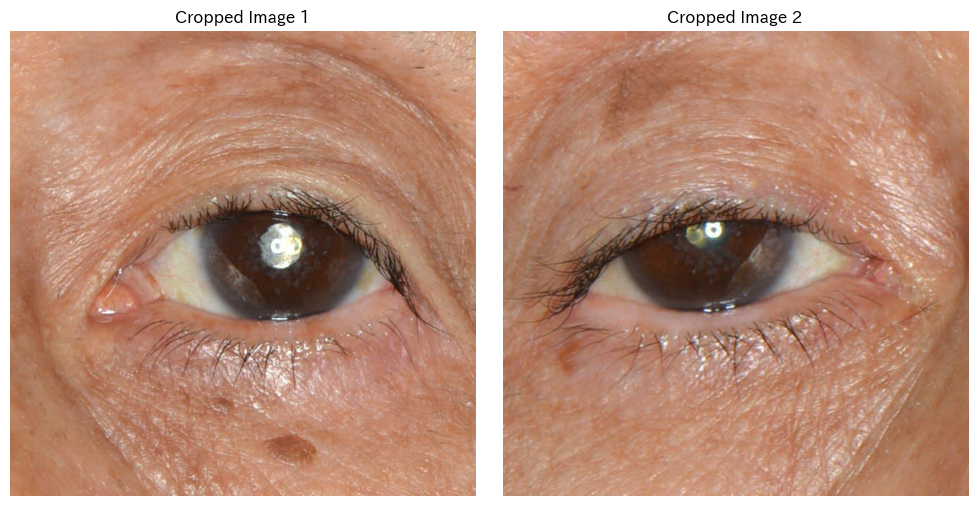


Displayed 2 cropped image(s).

--- Loading additional models ---
Segmentation model '/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/eyelid_caruncle_yolo11seg_1-139.pt' loaded successfully.
OBB model '/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/yolo11n_obb_1-295_1to139.pt' loaded successfully.

--- Processing 2 cropped image(s) with segmentation and OBB models ---
  Processing cropped image 1/2...
    Running segmentation model on image 1 with retina_masks=True...
    Segmentation applied to image 1.
    Running OBB model on image 1...
    OBB applied to image 1.
  Finished processing and merging for image 1.
  Processing cropped image 2/2...
    Running segmentation model on image 2 with retina_masks=True...
    Segmentation applied to image 2.
    Running OBB model on image 2...
    OBB applied to image 2.
  Finished processing and merging for image 2.

--- Displaying 2 merged image(s) ---


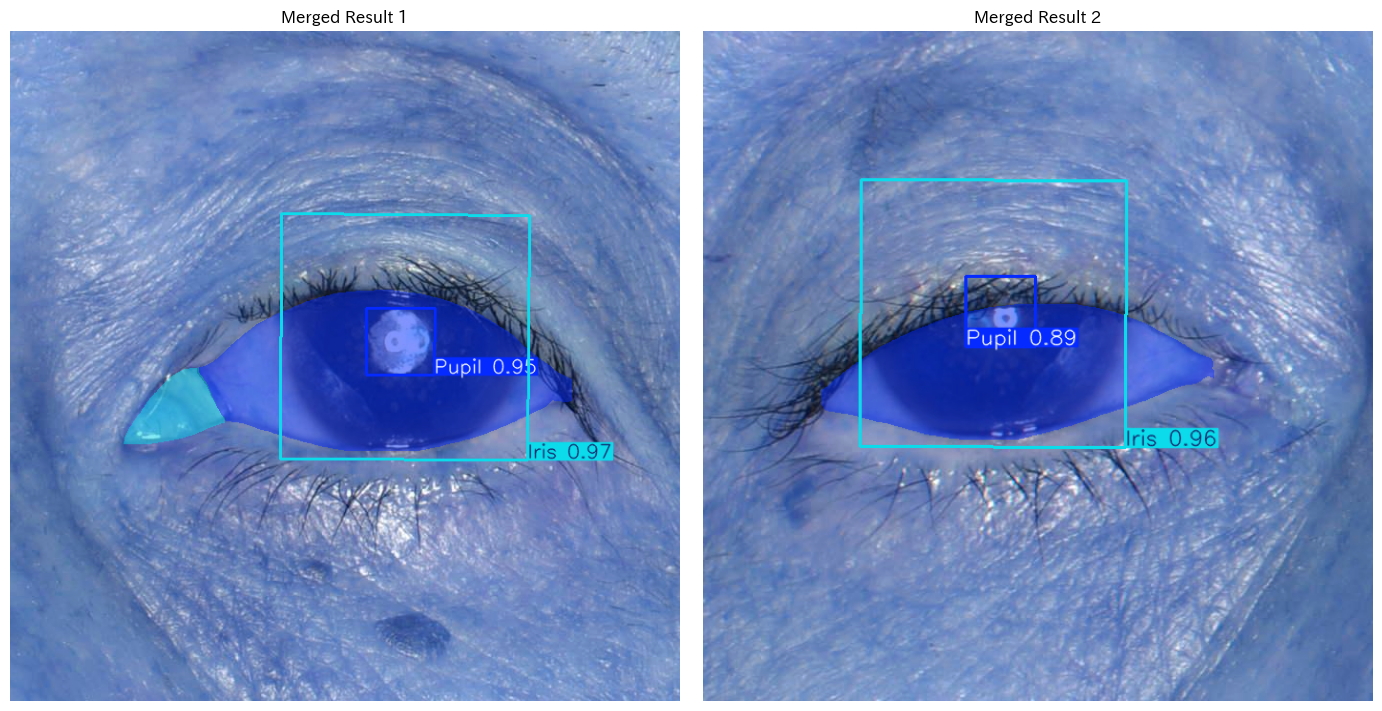

In [ ]:
from ultralytics import YOLO
from PIL import Image, ImageDraw
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Google Driveをマウント (Colabで実行する場合)
# try:
#     drive.mount('/content/drive')
# except OSError as e:
#     if "already mounted" in str(e).lower():
#         print("Google Drive is already mounted.")
#     else:
#         raise e

# --- 1. パス設定 ---
detect_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/295+cerebhq1-20000_yolo11l.pt"
# seg_model_path と obb_model_path はこのスクリプトでは使用しません
# seg_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/eyelid_caruncle_yolo11seg_1-139.pt"
# obb_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/yolo11n_obb_1-295_1to139.pt"
image_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_test_images/退行性眼瞼下垂/1065-20150514-73-130021_f6728a8d37efcf237c38e21309bb4ec7535a838429b7448eddfcc2b1fcc17e68.jpg"

# --- 2. モデルのロード ---
try:
    detect_model = YOLO(detect_model_path)
    print(f"Detection model '{detect_model_path}' loaded successfully.")
except Exception as e:
    print(f"Error loading detection model: {e}")
    # スクリプトの実行をここで停止するか、適切に処理
    exit()

# --- 3. 画像のロード ---
try:
    img_pil = Image.open(image_path).convert("RGB")
    img_cv_rgb = np.array(img_pil) # OpenCVで処理するためにNumpy配列 (RGB) に変換
    original_img_height, original_img_width = img_cv_rgb.shape[:2]
    print(f"Image '{image_path}' loaded successfully. Dimensions: {original_img_width}x{original_img_height}")
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
    exit()
except Exception as e:
    print(f"Error loading image: {e}")
    exit()

# --- ★★★ クロップ前の元画像を表示 (追加箇所) ★★★ ---
plt.figure(figsize=(8, 8)) # 表示サイズはお好みで調整してください
plt.imshow(img_pil) # または plt.imshow(img_cv_rgb)
plt.title(f"Original Image: {os.path.basename(image_path)}")
plt.axis("off")
plt.show()
print(f"Original image '{os.path.basename(image_path)}' displayed.")
# --- ★★★ 追加箇所ここまで ★★★ ---

# --- 4. 物体検出の実行 ---
print("Running detection model...")
results = detect_model(img_pil, verbose=False) # verbose=Falseで検出ログを抑制
print("Detection complete.")

# --- 5. BBoxの処理と画像の切り抜き ---
cropped_images_pil = []

if results and len(results) > 0 and results[0].boxes:
    boxes = results[0].boxes.xyxy.cpu().numpy()  # バウンディングボックスをxyxy形式で取得
    print(f"Found {len(boxes)} bounding box(es).")

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)

        bbox_width = x2 - x1
        bbox_height = y2 - y1
        bbox_center_x = x1 + bbox_width / 2.0
        bbox_center_y = y1 + bbox_height / 2.0

        print(f"\nProcessing BBox {i+1}: [x1={x1}, y1={y1}, x2={x2}, y2={y2}]")
        print(f"  Original BBox width: {bbox_width}, height: {bbox_height}, center: ({bbox_center_x:.2f}, {bbox_center_y:.2f})")

        # 横幅を25%ずつ水増し (元の1.5倍)
        new_width = int(round(bbox_width * 1.5))
        # 縦幅は新しい横幅と一致させる
        new_height = new_width

        print(f"  Target new width: {new_width}, new height: {new_height}")

        # 切り抜き用の座標を計算 (中心を維持)
        crop_x1 = int(round(bbox_center_x - new_width / 2.0))
        crop_y1 = int(round(bbox_center_y - new_height / 2.0))
        crop_x2 = crop_x1 + new_width
        crop_y2 = crop_y1 + new_height

        print(f"  Calculated crop window: [x1'={crop_x1}, y1'={crop_y1}, x2'={crop_x2}, y2'={crop_y2}]")

        # パディング量の計算
        pad_left = max(0, -crop_x1)
        pad_top = max(0, -crop_y1)
        pad_right = max(0, crop_x2 - original_img_width)
        pad_bottom = max(0, crop_y2 - original_img_height)

        print(f"  Padding needed: top={pad_top}, bottom={pad_bottom}, left={pad_left}, right={pad_right}")

        # 実際に画像から切り取る範囲を調整 (画像範囲内に収める)
        actual_crop_x1_img = crop_x1 + pad_left
        actual_crop_y1_img = crop_y1 + pad_top
        actual_crop_x2_img = crop_x2 - pad_right
        actual_crop_y2_img = crop_y2 - pad_bottom

        print(f"  Actual crop from image: [x_start={actual_crop_x1_img}, y_start={actual_crop_y1_img}, x_end={actual_crop_x2_img}, y_end={actual_crop_y2_img}]")

        # 画像を切り抜く (Numpy配列スライス)
        # スライスする前に、座標が画像の範囲内にあることを確認
        actual_crop_x1_img = max(0, actual_crop_x1_img)
        actual_crop_y1_img = max(0, actual_crop_y1_img)
        actual_crop_x2_img = min(original_img_width, actual_crop_x2_img)
        actual_crop_y2_img = min(original_img_height, actual_crop_y2_img)

        if actual_crop_x1_img >= actual_crop_x2_img or actual_crop_y1_img >= actual_crop_y2_img:
            print(f"  Skipping BBox {i+1} due to invalid crop dimensions after clamping.")
            # 有効な切り抜き領域がない場合は、黒一色の画像を生成するか、スキップ
            # ここでは、指定サイズの黒画像を生成
            cropped_part = np.zeros((new_height, new_width, 3), dtype=np.uint8)
        else:
            cropped_part_from_img = img_cv_rgb[actual_crop_y1_img:actual_crop_y2_img, actual_crop_x1_img:actual_crop_x2_img]
            # パディングを適用
            # cv2.copyMakeBorderのvalueはBGRだが、黒(0,0,0)なのでRGBでも同じ
            cropped_part = cv2.copyMakeBorder(
                cropped_part_from_img,
                pad_top,
                pad_bottom,
                pad_left,
                pad_right,
                cv2.BORDER_CONSTANT,
                value=[0, 0, 0]  # 黒でパディング
            )

        # 稀にパディング計算や丸め誤差で1pxずれることがある場合、リサイズで最終サイズを保証
        if cropped_part.shape[0] != new_height or cropped_part.shape[1] != new_width:
            print(f"  Warning: Padded crop size ({cropped_part.shape[1]}x{cropped_part.shape[0]}) differs from target ({new_width}x{new_height}). Resizing.")
            cropped_part = cv2.resize(cropped_part, (new_width, new_height), interpolation=cv2.INTER_AREA)


        cropped_images_pil.append(Image.fromarray(cropped_part)) # Pillow Imageとしてリストに追加
        print(f"  Cropped and padded image {i+1} generated. Final size: {cropped_part.shape[1]}x{cropped_part.shape[0]}")

else:
    print("No objects detected or no bounding boxes found in the results.")

# --- 6. 切り抜いた画像の表示 ---
if cropped_images_pil:
    num_cropped = len(cropped_images_pil)
    # 表示する画像の数に応じて subplot のレイアウトを調整
    cols = min(num_cropped, 3) # 最大3列で表示
    rows = (num_cropped + cols - 1) // cols # 必要な行数

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = np.array(axes).ravel() # axesを1次元配列に変換して扱いやすくする

    for i, cropped_img_pil in enumerate(cropped_images_pil):
        axes[i].imshow(cropped_img_pil)
        axes[i].set_title(f"Cropped Image {i+1}")
        axes[i].axis("off")

    # 余分な subplot を非表示にする
    for j in range(num_cropped, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
    print(f"\nDisplayed {num_cropped} cropped image(s).")
elif not (results and len(results) > 0 and results[0].boxes):
    pass # すでに "No objects detected..." のメッセージが表示されている
else:
    print("No valid bounding boxes were processed to generate cropped images.")


# --- 7. 追加モデルのロード ---
seg_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/eyelid_caruncle_yolo11seg_1-139.pt"
obb_model_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/models/yolo11n_obb_1-295_1to139.pt"

print("\n--- Loading additional models ---")
try:
    seg_model = YOLO(seg_model_path)
    print(f"Segmentation model '{seg_model_path}' loaded successfully.")
    obb_model = YOLO(obb_model_path)
    print(f"OBB model '{obb_model_path}' loaded successfully.")
except Exception as e:
    print(f"Error loading additional models: {e}")
    # エラーが発生した場合、以降の処理をスキップするかどうかを決定
    # ここでは、エラーメッセージを表示して終了する代わりに、merged_images_pilが空のまま処理を進める
    seg_model = None
    obb_model = None


# --- 8. 各切り抜き画像への推論と結果のマージ ---
merged_images_pil = []

if not cropped_images_pil:
    print("No cropped images from the previous step to process.")
elif seg_model is None or obb_model is None:
    print("One or more additional models failed to load. Skipping merge step.")
else:
    print(f"\n--- Processing {len(cropped_images_pil)} cropped image(s) with segmentation and OBB models ---")
    for i, base_cropped_pil in enumerate(cropped_images_pil):
        print(f"  Processing cropped image {i+1}/{len(cropped_images_pil)}...")

        # 元の切り抜き画像 (Pillow RGB) をコピーして作業用にする
        # 推論は元のクリーンな画像で行う
        current_pil_image = base_cropped_pil.copy()
        current_rgb_numpy = np.array(current_pil_image) # RGB NumPy array

        # 1. セグメンテーション推論と描画
        # plot()はBGRのNumPy配列を返す。入力imgはRGB/BGRのNumPy配列を受け付ける。
        # ここでは、まずセグメンテーションの結果を元のRGB画像に描画する。
        # plot()のimgに渡す配列はコピーする方が安全。
        img_with_seg_bgr = None
        try:
            print(f"    Running segmentation model on image {i+1} with retina_masks=True...")
            results_seg = seg_model(
                current_pil_image,
                verbose=False,
                conf=0.35, # confはお好みで調整
                retina_masks=True # ★ 高品質マスク生成オプションを追加
            )
            if results_seg and results_seg[0].masks is not None: # マスクが存在する場合のみ描画
                img_with_seg_bgr = results_seg[0].plot(
                    img=current_rgb_numpy.copy(), # 元のRGB画像に描画
                    pil=False,                    # NumPy配列(BGR)で結果取得
                    masks=True,                   # マスクを描画
                    boxes=False,                  # セグメンテーションのBBoxは描画しない (任意)
                    labels=True                   # ラベルを描画
                )
                print(f"    Segmentation applied to image {i+1}.")
            else:
                print(f"    No segmentation masks found by seg_model for image {i+1}.")
                # マスクがない場合は、元の画像をBGRに変換したものを使用
                img_with_seg_bgr = cv2.cvtColor(current_rgb_numpy.copy(), cv2.COLOR_RGB2BGR)

        except Exception as e:
            print(f"    Error during segmentation on image {i+1}: {e}")
            # エラー発生時は、元の画像をBGRに変換したものを次のステップのベースとする
            img_with_seg_bgr = cv2.cvtColor(current_rgb_numpy.copy(), cv2.COLOR_RGB2BGR)


        # 2. OBB推論と描画
        # OBBモデルの推論は、元のクリーンな画像 (current_pil_image) で行う。
        # 描画は、セグメンテーションが描画された画像 (img_with_seg_bgr) に対して行う。
        final_img_np_bgr = None
        try:
            print(f"    Running OBB model on image {i+1}...")
            results_obb = obb_model(current_pil_image, verbose=False, conf=0.35) # confはお好みで調整
            if results_obb and hasattr(results_obb[0], 'obb') and results_obb[0].obb is not None: # OBBが存在する場合のみ描画
                 # OBBの結果を、セグメンテーションが描画済みの画像 (img_with_seg_bgr) に重ねて描画
                final_img_np_bgr = results_obb[0].plot(
                    img=img_with_seg_bgr.copy(), # セグメンテーション描画済みのBGR画像
                    pil=False,                 # NumPy配列(BGR)で結果取得
                    masks=False,               # OBBモデルは通常マスク出力しない
                    boxes=True,                # OBBを描画 (これがOBBを描画するはず)
                    labels=True                # ラベルを描画
                )
                print(f"    OBB applied to image {i+1}.")
            else:
                print(f"    No OBB detections found by obb_model for image {i+1}.")
                final_img_np_bgr = img_with_seg_bgr.copy() # OBBがない場合は直前の画像

        except Exception as e:
            print(f"    Error during OBB detection on image {i+1}: {e}")
            # エラー発生時は、セグメンテーション描画後の画像を最終結果とする
            final_img_np_bgr = img_with_seg_bgr.copy()

        # 最終結果 (BGR NumPy array) をPillow Image (RGB) に変換してリストに追加
        final_img_pil = Image.fromarray(cv2.cvtColor(final_img_np_bgr, cv2.COLOR_BGR2RGB))
        merged_images_pil.append(final_img_pil)
        print(f"  Finished processing and merging for image {i+1}.")

# --- 9. マージされた画像の表示 ---
if merged_images_pil:
    print(f"\n--- Displaying {len(merged_images_pil)} merged image(s) ---")
    num_merged = len(merged_images_pil)
    # 表示する画像の数に応じて subplot のレイアウトを調整
    cols = min(num_merged, 3) # 最大3列で表示
    rows = (num_merged + cols - 1) // cols # 必要な行数

    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 7 * rows)) # figsizeを少し調整
    if num_merged == 1: # 画像が1枚の場合、axesはオブジェクトであり、配列ではない
        axes = np.array([axes])
    axes = axes.ravel() # axesを1次元配列に変換して扱いやすくする

    for i, merged_img_pil in enumerate(merged_images_pil):
        axes[i].imshow(merged_img_pil)
        axes[i].set_title(f"Merged Result {i+1}")
        axes[i].axis("off")

    # 余分な subplot があれば非表示にする
    for j in range(num_merged, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
else:
    if cropped_images_pil and (seg_model is not None and obb_model is not None):
        print("No images were successfully merged. Check logs for errors.")
    # cropped_images_pilが空だった場合やモデルロード失敗のメッセージは既に表示されている

# **Simple MPLD analysis**

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import math
import os
import torch
# Colabで日本語フォントを使用するための準備 (事前にセルで実行推奨)
# !pip install japanize-matplotlib
import japanize_matplotlib # インポートするだけで日本語表示が改善されます

# --- 1. パス設定 ---
# !!!以下のパスはご自身の環境に合わせてください!!!
drive_base_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/" # Google Driveのベースパス例
detect_model_path = os.path.join(drive_base_path, "models/295+cerebhq1-20000_yolo11l.pt")
seg_model_path = os.path.join(drive_base_path, "models/eyelid_caruncle_yolo11seg_1-139.pt")
obb_model_path = os.path.join(drive_base_path, "models/yolo11n_obb_1-295_1to139.pt")
image_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_test_images/退行性眼瞼下垂/1065-20150514-73-130021_f6728a8d37efcf237c38e21309bb4ec7535a838429b7448eddfcc2b1fcc17e68.jpg" # 解析したい画像へのパス

# --- 定数定義 ---
OBB_CLASS_PUPIL = 'Pupil'
OBB_CLASS_IRIS = 'Iris'
SEG_CLASS_EYELID = 'Eyelid'
CORNEAL_DIAMETER_MM = 12.0
RADIAL_ANGLES_DEG = [i * 15 for i in range(24)] # 0°から345°まで15°間隔

# --- 出力ディレクトリ作成 ---
output_dir = "/content/mrmpd_results"
os.makedirs(output_dir, exist_ok=True)
print(f"結果は '{output_dir}' ディレクトリに保存されます。")

# --- ヘルパー関数: OBBデータ抽出 ---
def get_obb_data_by_class_name(obb_results_obj, target_class_name, model_obb_names, img_idx_for_debug="N/A"):
    if obb_results_obj is None or not hasattr(obb_results_obj, 'obb') or obb_results_obj.obb is None or \
       not hasattr(obb_results_obj.obb, 'cls') or len(obb_results_obj.obb.cls) == 0:
        return None
    target_cls_indices = []
    if isinstance(model_obb_names, dict): # モデルのnames属性が辞書の場合
        for cls_id, name in model_obb_names.items():
            if name == target_class_name:
                target_cls_indices.append(int(cls_id)) # クラスIDは整数
    elif isinstance(model_obb_names, list): # モデルのnames属性がリストの場合
        for cls_id, name in enumerate(model_obb_names):
            if name == target_class_name:
                target_cls_indices.append(cls_id)
    else: # 不明な形式
        print(f"警告 (画像 {img_idx_for_debug}, get_obb_data): model_obb_names の形式が不明です: {type(model_obb_names)}")
        return None

    if not target_cls_indices: return None
    best_obb_data = None; highest_conf = -1.0
    if not hasattr(obb_results_obj.obb, 'conf') or not hasattr(obb_results_obj.obb, 'xywhr'): return None

    detected_classes = obb_results_obj.obb.cls.cpu().numpy().astype(int)
    confidences = obb_results_obj.obb.conf.cpu().numpy()
    xywhr_data = obb_results_obj.obb.xywhr.cpu().numpy()

    found_instances = 0
    for i in range(len(detected_classes)):
        if detected_classes[i] in target_cls_indices:
            found_instances +=1; current_conf = confidences[i]
            if current_conf > highest_conf:
                highest_conf = current_conf
                best_obb_data = {
                    "center_x": xywhr_data[i][0], "center_y": xywhr_data[i][1],
                    "width": xywhr_data[i][2], "height": xywhr_data[i][3],
                    "angle_rad": xywhr_data[i][4], "confidence": current_conf
                }
    return best_obb_data if found_instances > 0 and best_obb_data is not None else None

# --- ヘルパー関数: セグメンテーションマスク抽出 ---
def get_mask_by_class_name(seg_results_obj, target_class_name, model_seg_names, target_shape_hw, img_idx_for_debug="N/A"):
    if seg_results_obj.masks is None: return None
    if not hasattr(seg_results_obj.masks, 'data') or seg_results_obj.masks.data is None: return None
    if seg_results_obj.boxes is None: return None # boxes属性もチェック

    target_cls_indices = []
    if isinstance(model_seg_names, dict): # モデルのnames属性が辞書の場合
        for cls_id, name in model_seg_names.items():
            if name == target_class_name: target_cls_indices.append(int(cls_id))
    elif isinstance(model_seg_names, list): # モデルのnames属性がリストの場合
        for cls_id, name in enumerate(model_seg_names):
            if name == target_class_name: target_cls_indices.append(cls_id)
    else:
        print(f"警告 (画像 {img_idx_for_debug}, get_mask): model_seg_names の形式が不明です: {type(model_seg_names)}")
        return None

    if not target_cls_indices: return None

    relevant_masks_data = []
    all_detected_cls_indices = seg_results_obj.boxes.cls.cpu().numpy().astype(int)
    raw_masks_tensor = seg_results_obj.masks.data # (N, H_proto, W_proto)

    if raw_masks_tensor is None or len(raw_masks_tensor) == 0: return None

    # boxesの数とmasks.dataの最初の次元が一致するか確認
    if len(all_detected_cls_indices) != raw_masks_tensor.shape[0]:
        print(f"警告 (画像 {img_idx_for_debug}, get_mask): ボックス数 ({len(all_detected_cls_indices)}) とマスク数 ({raw_masks_tensor.shape[0]}) が一致しません。")
        # 処理を続行するか、ここでエラーとするか検討。短い方でループするのが安全
        num_to_iterate = min(len(all_detected_cls_indices), raw_masks_tensor.shape[0])
    else:
        num_to_iterate = len(all_detected_cls_indices)

    for i in range(num_to_iterate):
        current_model_cls_idx = all_detected_cls_indices[i]
        if current_model_cls_idx in target_cls_indices:
            try:
                mask_proto = raw_masks_tensor[i]; # (H_proto, W_proto)
                mask_proto_tensor = mask_proto.unsqueeze(0).unsqueeze(0) # (1,1,H_proto,W_proto)

                if mask_proto_tensor.shape[2:] == target_shape_hw: # 既にターゲットサイズの場合
                    upsampled_mask_tensor = mask_proto_tensor.squeeze()
                else: # アップサンプリング
                    upsampled_mask_tensor = torch.nn.functional.interpolate(
                        mask_proto_tensor, size=target_shape_hw, mode='bilinear', align_corners=False
                    ).squeeze() # (target_H, target_W)

                mask_np = upsampled_mask_tensor.cpu().numpy()
                mask_np_binary = (mask_np > 0.5).astype(np.uint8) * 255
                contours, _ = cv2.findContours(mask_np_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                area = sum(cv2.contourArea(c) for c in contours) if contours else 0
                if area > 0: relevant_masks_data.append({'mask': mask_np_binary, 'area': area})
            except Exception as e:
                print(f"エラー (画像 {img_idx_for_debug}, get_mask): '{target_class_name}' のインスタンス {i} のマスク処理中に例外: {e}")
                continue # このマスクの処理はスキップ

    if not relevant_masks_data: return None
    largest_mask_data = max(relevant_masks_data, key=lambda x: x['area'])
    return largest_mask_data['mask']

# --- ヘルパー関数: 角度の正規化と範囲チェック ---
def normalize_angle_deg(angle_deg):
    angle = angle_deg % 360
    return angle if angle >= 0 else angle + 360

def is_angle_in_upper_lid_range(angle_deg_to_check, inner_end_deg, outer_end_deg):
    """指定された角度が、定義された上まぶたの角度範囲内（内端から反時計回りに外端まで）にあるか判定"""
    angle = normalize_angle_deg(angle_deg_to_check)
    start = normalize_angle_deg(inner_end_deg) # 例: 350 (ほぼ0に近い右)
    end = normalize_angle_deg(outer_end_deg)   # 例: 190 (左下)

    if start <= end: # 0度をまたがない範囲 (例: start=10, end=170) -> 上まぶたが通常の半円に近い場合
        return start <= angle <= end
    else: # 0度をまたぐ範囲 (例: start=350 (右側), end=20 (右側)) -> 上まぶたが0度をまたいでいる場合
        return angle >= start or angle <= end

# --- ヘルパー関数: 左右マージ極座標プロット生成 ---
def generate_merged_polar_plot(all_results, output_dir_path):
    print("\n--- 左右マージ極座標プロットを生成します ---")
    fig_merged_polar, ax_merged_polar = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
    has_right_eye_data, has_left_eye_data = False, False

    for result_data in all_results:
        if result_data.get("status") != "処理完了": continue
        mpld_mm = result_data.get("mpld_mm", {}); radial_angles = result_data.get("radial_angles_deg", RADIAL_ANGLES_DEG)
        eye_side = result_data.get("eye_side", "Unknown")

        plot_angles_rad, plot_radii_mm = [], []
        first_point_angle_rad_orig, first_point_radius_mm_orig = None, None

        for angle_deg in radial_angles: # 全周の角度を使う
            val_mm = mpld_mm.get(angle_deg, np.nan)
            if not np.isnan(val_mm):
                current_angle_rad = math.radians(angle_deg)
                plot_angle_rad_to_use = current_angle_rad
                if eye_side == 'L': # 左眼の場合は角度を水平反転して重ね合わせる
                    transformed_angle_deg = normalize_angle_deg(180 - angle_deg)
                    plot_angle_rad_to_use = math.radians(transformed_angle_deg)

                plot_angles_rad.append(plot_angle_rad_to_use)
                plot_radii_mm.append(val_mm)

                if angle_deg == 0: # ループを閉じるための元の0度データを保存
                    first_point_angle_rad_orig = current_angle_rad
                    first_point_radius_mm_orig = val_mm

        if not plot_radii_mm: continue

        # ループを閉じる処理 (変換後の角度リストに追加)
        if first_point_angle_rad_orig is not None and first_point_radius_mm_orig is not None and len(plot_radii_mm) > 1:
            final_closing_angle_rad = first_point_angle_rad_orig
            if eye_side == 'L': # 左眼の場合、閉じる点も変換後の0度（つまり物理的な180度）
                final_closing_angle_rad = math.radians(normalize_angle_deg(180 - 0))
            plot_angles_rad.append(final_closing_angle_rad)
            plot_radii_mm.append(first_point_radius_mm_orig)

        line_color, label_base, has_data_flag = 'gray', '不明な眼', False
        if eye_side == 'R': line_color, label_base, has_data_flag = 'blue', '右眼', has_right_eye_data
        elif eye_side == 'L': line_color, label_base, has_data_flag = 'red', '左眼 (表示反転)', has_left_eye_data # ラベル変更

        current_label = f'{label_base} MPLD' if not has_data_flag else None # 凡例は初回のみ
        ax_merged_polar.plot(plot_angles_rad, plot_radii_mm, marker='o' if not has_data_flag else '.', linestyle='-', color=line_color, label=current_label, alpha=1.0 if not has_data_flag else 0.6)
        if eye_side == 'R' and not has_right_eye_data: has_right_eye_data = True
        if eye_side == 'L' and not has_left_eye_data: has_left_eye_data = True

    if not has_right_eye_data and not has_left_eye_data:
        print("  左右マージプロット用の有効なデータがありませんでした。")
        plt.close(fig_merged_polar) # プロットウィンドウを閉じる
        return

    ax_merged_polar.set_theta_zero_location("E"); ax_merged_polar.set_theta_direction(1)
    angle_ticks_to_display = RADIAL_ANGLES_DEG[::3]; ax_merged_polar.set_xticks(np.deg2rad(angle_ticks_to_display))
    ax_merged_polar.set_xticklabels([f"{angle}°" for angle in angle_ticks_to_display])

    all_radii_for_rmax = [r for res in all_results if res.get("status") == "処理完了" for r_list in [res.get("mpld_mm", {}).values()] for r in r_list if not np.isnan(r)]
    if all_radii_for_rmax:
        max_r_val = max(all_radii_for_rmax) if all_radii_for_rmax else 5.0
        ax_merged_polar.set_rmax(math.ceil(max_r_val * 1.1 if max_r_val > 0 else 5.0))
    else: ax_merged_polar.set_rmax(5.0)
    ax_merged_polar.set_title(f"左右MPLDマージプロット (mm)", va='bottom', pad=20); ax_merged_polar.legend()
    merged_plot_filename = os.path.join(output_dir_path, f"mrmpd_merged_polar_plot.png")
    try: fig_merged_polar.savefig(merged_plot_filename); print(f"  左右マージ極座標プロットを保存しました: {merged_plot_filename}")
    except Exception as e: print(f"  左右マージ極座標プロットの保存に失敗しました: {e}")
    plt.show()

# --- メイン処理開始 ---
# 1. モデルのロード
print("--- モデルのロードを開始します ---")
try:
    detect_model = YOLO(detect_model_path)
    print(f"Detection model '{detect_model_path}' loaded successfully.")
    print(f"  【確認】detect_model クラス名: {detect_model.names}")
    seg_model = YOLO(seg_model_path)
    print(f"Segmentation model '{seg_model_path}' loaded successfully.")
    print(f"  【確認】seg_model クラス名: {seg_model.names}")
    obb_model = YOLO(obb_model_path)
    print(f"OBB model '{obb_model_path}' loaded successfully.")
    print(f"  【確認】obb_model クラス名: {obb_model.names}")
except Exception as e:
    print(f"モデルのロード中にエラーが発生しました: {e}"); exit()

# 2. 画像のロード
print(f"\n--- 画像 '{image_path}' のロードを開始 ---")
try:
    img_pil_original = Image.open(image_path).convert("RGB")
    img_cv_original_rgb = np.array(img_pil_original)
    original_img_h, original_img_w = img_cv_original_rgb.shape[:2]
    print(f"Image '{image_path}' loaded. Dimensions: {original_img_w}x{original_img_h}")
except Exception as e:
    print(f"画像のロード中にエラー: {e}"); exit()

# 3. 元画像の表示
plt.figure(figsize=(8, 8)); plt.imshow(img_pil_original)
plt.title(f"元画像: {os.path.basename(image_path)}"); plt.axis("off"); plt.show()

# 4. 物体検出の実行 (detect_model)
print("\n--- 物体検出を実行中 (detect_model) ---")
detect_results_list = detect_model(img_pil_original, verbose=False, conf=0.3)
if not detect_results_list or len(detect_results_list[0].boxes) == 0:
    print("物体が検出されませんでした。処理を終了します。"); exit()
detect_result_obj = detect_results_list[0]
print("物体検出完了。")

# 5. BBoxの処理と画像の切り抜き & 左右眼判定
cropped_images_info_list = []
boxes_xyxy = detect_result_obj.boxes.xyxy.cpu().numpy()
class_indices = detect_result_obj.boxes.cls.cpu().numpy().astype(int)
print(f"{len(boxes_xyxy)} 個のバウンディングボックスが見つかりました。")

for i in range(len(boxes_xyxy)):
    box = boxes_xyxy[i]; x1, y1, x2, y2 = map(int, box)
    cls_idx = class_indices[i]; class_name = detect_model.names[cls_idx]
    eye_side = "Unknown"
    if class_name == 'Left_eye': eye_side = "L"
    elif class_name == 'Right_eye': eye_side = "R"
    print(f"\nBBox {i+1} 処理中: Class='{class_name}', Side='{eye_side}'")
    bbox_width = x2 - x1; bbox_height = y2 - y1
    if bbox_width <= 0 or bbox_height <= 0: print(f"  無効なBBoxサイズ。スキップ。"); continue
    bbox_center_x = x1 + bbox_width / 2.0; bbox_center_y = y1 + bbox_height / 2.0
    new_width = int(round(bbox_width * 1.5)); new_height = new_width
    crop_x1 = int(round(bbox_center_x - new_width / 2.0)); crop_y1 = int(round(bbox_center_y - new_height / 2.0))
    crop_x2 = crop_x1 + new_width; crop_y2 = crop_y1 + new_height
    slice_x1 = max(0, crop_x1); slice_y1 = max(0, crop_y1)
    slice_x2 = min(original_img_w, crop_x2); slice_y2 = min(original_img_h, crop_y2)
    cropped_part_final = None
    if slice_x1 >= slice_x2 or slice_y1 >= slice_y2:
        print(f"  有効な切り取り領域なし。サイズ {new_width}x{new_height} の黒画像を生成。")
        cropped_part_final = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    else:
        img_slice = img_cv_original_rgb[slice_y1:slice_y2, slice_x1:slice_x2]
        if img_slice.size == 0:
             print(f"  切り出し部分サイズ0。黒画像生成。"); cropped_part_final = np.zeros((new_height, new_width, 3), dtype=np.uint8)
        else:
            pad_left = max(0, -crop_x1); pad_top = max(0, -crop_y1)
            pad_right = max(0, crop_x2 - original_img_w); pad_bottom = max(0, crop_y2 - original_img_h)
            cropped_part_with_border = cv2.copyMakeBorder(img_slice, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=[0,0,0])
            if cropped_part_with_border.shape[0] != new_height or cropped_part_with_border.shape[1] != new_width:
                cropped_part_final = cv2.resize(cropped_part_with_border, (new_width, new_height), interpolation=cv2.INTER_AREA)
            else:
                cropped_part_final = cropped_part_with_border
    if cropped_part_final is not None:
        cropped_image_pil_object = Image.fromarray(cropped_part_final)
        cropped_image_pil_object.filename = f"{os.path.basename(image_path)}_bbox{i+1}_{eye_side}"
        cropped_images_info_list.append({"image": cropped_image_pil_object, "eye_side": eye_side, "original_bbox_index": i, "source_filename": os.path.basename(image_path)})
        print(f"  クロップ画像 {i+1} (Side: {eye_side}) 生成完了。Shape: {cropped_part_final.shape[:2]}")
    else: print(f"  クロップ画像 {i+1} (Side: {eye_side}) 生成失敗。")
print(f"\n{len(cropped_images_info_list)} 個のクロップ画像を生成 (左右情報含む)。")

# 6. 切り抜いた画像の表示
if cropped_images_info_list:
    num_cropped = len(cropped_images_info_list)
    cols = min(num_cropped, 3); rows = (num_cropped + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), squeeze=False)
    axes = axes.ravel()
    for i, img_info in enumerate(cropped_images_info_list):
        axes[i].imshow(img_info["image"])
        axes[i].set_title(f"Cropped {i+1} (Side: {img_info['eye_side']})"); axes[i].axis("off")
    for j in range(num_cropped, len(axes)): axes[j].axis("off")
    plt.tight_layout(); plt.show()
    print(f"{num_cropped} 個のクロップ画像を表示。")
else: print("表示するクロップ画像なし。")

# --- MRMPD解析メイン処理 ---
print("\n--- MRMPD解析を開始します (メイン処理) ---")
if not cropped_images_info_list: print("MRMPD解析対象のクロップ画像なし。終了。"); exit()
all_mrmpd_results_data = []

for img_idx, img_info in enumerate(cropped_images_info_list):
    pil_image_clean_crop = img_info["image"]; eye_side_detected = img_info["eye_side"]
    source_file_basename = os.path.splitext(img_info["source_filename"])[0]
    debug_img_id_str = f"{source_file_basename}_bbox{img_info['original_bbox_index']+1}_{eye_side_detected}"
    print(f"\n--- 画像 {debug_img_id_str} のMRMPD解析を開始 ---")
    current_mrmpd_data = {"image_id": debug_img_id_str, "status": "処理開始", "eye_side": eye_side_detected}
    img_np_rgb = np.array(pil_image_clean_crop.convert("RGB")); img_h, img_w = img_np_rgb.shape[:2]
    pupil_center, pixels_per_mm = None, None
    try:
        obb_results_list = obb_model(pil_image_clean_crop, verbose=False, conf=0.25)
        if not obb_results_list: raise ValueError("OBBモデル結果なし")
        obb_result_obj = obb_results_list[0]
        pupil_obb_data = get_obb_data_by_class_name(obb_result_obj, OBB_CLASS_PUPIL, obb_model.names, debug_img_id_str)
        if not pupil_obb_data: raise ValueError(f"'{OBB_CLASS_PUPIL}' OBBなし")
        pupil_center = (int(round(pupil_obb_data["center_x"])), int(round(pupil_obb_data["center_y"])))
        current_mrmpd_data["pupil_center_px"] = pupil_center; print(f"  瞳孔中心: {pupil_center}")
        iris_obb_data = get_obb_data_by_class_name(obb_result_obj, OBB_CLASS_IRIS, obb_model.names, debug_img_id_str)
        if not iris_obb_data: raise ValueError(f"'{OBB_CLASS_IRIS}' OBBなし")
        major_axis_pixels = max(iris_obb_data["width"], iris_obb_data["height"])
        if not major_axis_pixels > 0: raise ValueError(f"'{OBB_CLASS_IRIS}' OBB長径0")
        pixels_per_mm = major_axis_pixels / CORNEAL_DIAMETER_MM
        current_mrmpd_data["pixels_per_mm"] = pixels_per_mm; current_mrmpd_data["iris_major_axis_px"] = major_axis_pixels
        print(f"  虹彩長径: {major_axis_pixels:.2f}px。スケール: {pixels_per_mm:.2f} px/mm")
    except Exception as e: error_msg = f"OBB処理エラー: {e}"; print(f"エラー (画像 {debug_img_id_str}): {error_msg}"); current_mrmpd_data.update({"error": error_msg, "status": "OBBエラー"}); all_mrmpd_results_data.append(current_mrmpd_data); continue

    eyelid_mask_area = None
    try:
        seg_results_list = seg_model(pil_image_clean_crop, verbose=False, conf=0.25, retina_masks=True)
        if not seg_results_list: raise ValueError("Segモデル結果なし")
        seg_result_obj = seg_results_list[0]
        eyelid_mask_area = get_mask_by_class_name(seg_result_obj, SEG_CLASS_EYELID, seg_model.names, (img_h, img_w), debug_img_id_str)
        if eyelid_mask_area is None: raise ValueError(f"'{SEG_CLASS_EYELID}' マスクなし")
        print(f"  '{SEG_CLASS_EYELID}' マスク取得成功。")
    except Exception as e: error_msg = f"Seg処理エラー: {e}"; print(f"エラー (画像 {debug_img_id_str}): {error_msg}"); current_mrmpd_data.update({"error": error_msg, "status": "Segエラー"}); all_mrmpd_results_data.append(current_mrmpd_data); continue

    angle_inner_end_deg, angle_outer_end_deg = 0.0, 180.0
    try:
        contours, _ = cv2.findContours(eyelid_mask_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours: raise ValueError("Eyelid輪郭なし")
        largest_contour = max(contours, key=cv2.contourArea); pupil_cx, pupil_cy = pupil_center
        y_tolerance = img_h * 0.15
        points_near_pupil_height = [tuple(p[0]) for p_arr in largest_contour for p in [p_arr] if abs(p[0][1] - pupil_cy) <= y_tolerance]
        if len(points_near_pupil_height) < 2 : print(f"  警告 (画像 {debug_img_id_str}): 瞳孔水平線近くのEyelid輪郭点不十分。上まぶた範囲はデフォルト(0-180度)。")
        else:
            right_points = [p for p in points_near_pupil_height if p[0] > pupil_cx]
            left_points = [p for p in points_near_pupil_height if p[0] < pupil_cx]
            if not right_points or not left_points: print(f"  警告 (画像 {debug_img_id_str}): 瞳孔水平線上で左右両端のEyelid輪郭点なし。上まぶた範囲はデフォルト(0-180度)。")
            else:
                inner_end_point = max(right_points, key=lambda p: p[0]); outer_end_point = min(left_points, key=lambda p: p[0])
                angle_inner_end_rad = math.atan2(pupil_cy - inner_end_point[1], inner_end_point[0] - pupil_cx)
                angle_outer_end_rad = math.atan2(pupil_cy - outer_end_point[1], outer_end_point[0] - pupil_cx)
                angle_inner_end_deg = normalize_angle_deg(math.degrees(angle_inner_end_rad))
                angle_outer_end_deg = normalize_angle_deg(math.degrees(angle_outer_end_rad))
        current_mrmpd_data["angle_inner_end_deg"] = angle_inner_end_deg; current_mrmpd_data["angle_outer_end_deg"] = angle_outer_end_deg
        print(f"  上まぶた端角度(推定): 内端 {angle_inner_end_deg:.1f}°, 外端 {angle_outer_end_deg:.1f}°")
    except Exception as e: print(f"警告(画像 {debug_img_id_str}): 上まぶた端角度特定エラー: {e}。非対称比は0-180度範囲で処理。"); current_mrmpd_data["angle_determination_error"] = str(e)

    mpld_mm_values = {}; intersection_points_coords = {}; max_search_radius = int(math.sqrt(img_w**2 + img_h**2))
    if not (0 <= pupil_cx < img_w and 0 <= pupil_cy < img_h and eyelid_mask_area[pupil_cy, pupil_cx] > 0):
        print(f"警告 (画像 {debug_img_id_str}): 瞳孔中心 ({pupil_center}) がEyelidマスク外または値0。MPLD計算不正確の可能性あり。")
    for angle_deg in RADIAL_ANGLES_DEG:
        angle_rad = math.radians(angle_deg); last_known_mask_point = None
        current_distance_at_last_mask_point = np.nan; found_exit_point_for_this_angle = False
        for r_step in range(1, max_search_radius + 1):
            x_curr = int(round(pupil_cx + r_step * math.cos(angle_rad))); y_curr = int(round(pupil_cy - r_step * math.sin(angle_rad)))
            if not (0 <= x_curr < img_w and 0 <= y_curr < img_h):
                if last_known_mask_point is not None: mpld_mm_values[angle_deg] = current_distance_at_last_mask_point / pixels_per_mm; intersection_points_coords[angle_deg] = last_known_mask_point; found_exit_point_for_this_angle = True
                break
            if eyelid_mask_area[y_curr, x_curr] > 0: last_known_mask_point = (x_curr, y_curr); current_distance_at_last_mask_point = r_step
            else:
                if last_known_mask_point is not None: mpld_mm_values[angle_deg] = current_distance_at_last_mask_point / pixels_per_mm; intersection_points_coords[angle_deg] = last_known_mask_point; found_exit_point_for_this_angle = True
                break
        if not found_exit_point_for_this_angle:
            if last_known_mask_point is not None: mpld_mm_values[angle_deg] = current_distance_at_last_mask_point / pixels_per_mm; intersection_points_coords[angle_deg] = last_known_mask_point
            else: mpld_mm_values[angle_deg] = np.nan; intersection_points_coords[angle_deg] = None
    current_mrmpd_data["mpld_mm"] = mpld_mm_values; current_mrmpd_data["intersections_px"] = intersection_points_coords
    current_mrmpd_data["radial_angles_deg"] = RADIAL_ANGLES_DEG; print(f"  MPLD計算完了（全周）。")

    mrd1_mm = mpld_mm_values.get(90.0, np.nan); mrd2_mm = mpld_mm_values.get(270.0, np.nan)
    current_mrmpd_data["MRD1_mm"] = mrd1_mm; current_mrmpd_data["MRD2_mm"] = mrd2_mm
    print(f"  MRD-1 (90°): {mrd1_mm:.2f} mm" if not np.isnan(mrd1_mm) else "  MRD-1 (90°): N/A")
    print(f"  MRD-2 (270°): {mrd2_mm:.2f} mm" if not np.isnan(mrd2_mm) else "  MRD-2 (270°): N/A")

    img_viz_mrmpd_pil = pil_image_clean_crop.copy().convert("RGB"); draw = ImageDraw.Draw(img_viz_mrmpd_pil)
    draw.ellipse((pupil_cx-3, pupil_cy-3, pupil_cx+3, pupil_cy+3), fill="red", outline="red")
    for angle_deg in RADIAL_ANGLES_DEG:
        int_pt = intersection_points_coords.get(angle_deg); line_color = "yellow"
        if angle_deg == 90.0 and int_pt: line_color = "lime"
        if angle_deg == 270.0 and int_pt: line_color = "green"
        if int_pt: draw.line([(pupil_cx, pupil_cy), int_pt], fill=line_color, width=2); draw.ellipse((int_pt[0]-3, int_pt[1]-3, int_pt[0]+3, int_pt[1]+3), fill="cyan", outline="cyan")
        else: angle_rad = math.radians(angle_deg); end_x_no_int = int(round(pupil_cx + 30 * math.cos(angle_rad))); end_y_no_int = int(round(pupil_cy - 30 * math.sin(angle_rad))); draw.line([(pupil_cx, pupil_cy), (end_x_no_int, end_y_no_int)], fill=(128,128,128,180), width=1)
    plt.figure(figsize=(8, 8)); plt.imshow(img_viz_mrmpd_pil)
    title_str = f"MRMPD解析結果 - 画像 {debug_img_id_str}"
    if not np.isnan(mrd1_mm): title_str += f"\nMRD1: {mrd1_mm:.2f}mm"
    if not np.isnan(mrd2_mm): title_str += f", MRD2: {mrd2_mm:.2f}mm"
    plt.title(title_str); plt.axis("off"); viz_filename = os.path.join(output_dir, f"mrmpd_visualization_{debug_img_id_str}.png")
    try: img_viz_mrmpd_pil.save(viz_filename); print(f"  可視化画像を保存: {viz_filename}")
    except Exception as e: print(f"  可視化画像保存失敗: {e}")
    plt.show()

    # --- 5b. 個別極座標プロット (左眼の場合の軸ラベル修正) ---
    valid_plot_angles_rad, valid_plot_radii_mm = [], []
    first_point_angle_rad_indiv, first_point_radius_mm_indiv = None, None
    for angle_deg_plot in RADIAL_ANGLES_DEG:
        val_mm = mpld_mm_values.get(angle_deg_plot, np.nan)
        if not np.isnan(val_mm):
            current_angle_rad = math.radians(angle_deg_plot)
            valid_plot_angles_rad.append(current_angle_rad); valid_plot_radii_mm.append(val_mm)
            if angle_deg_plot == 0: first_point_angle_rad_indiv, first_point_radius_mm_indiv = current_angle_rad, val_mm
    if valid_plot_radii_mm:
        if first_point_angle_rad_indiv is not None and first_point_radius_mm_indiv is not None and len(valid_plot_radii_mm) > 1:
            valid_plot_angles_rad.append(first_point_angle_rad_indiv); valid_plot_radii_mm.append(first_point_radius_mm_indiv)

        fig_polar, ax_polar = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
        ax_polar.plot(valid_plot_angles_rad, valid_plot_radii_mm, marker='o', linestyle='-')

        # 軸の向きとラベルを設定
        ax_polar.set_theta_zero_location("E")  # 物理的な0度(プロット基準)は東(右)
        ax_polar.set_theta_direction(1)      # 角度は反時計回り (標準)

        # 表示する目盛りの物理的な角度 (画像座標系)
        angle_ticks_physical_deg = np.array(RADIAL_ANGLES_DEG[::3]) # 例: [0, 45, 90, ...]
        ax_polar.set_xticks(np.deg2rad(angle_ticks_physical_deg))

        if eye_side_detected == 'L': # ★★★ 左眼の場合のみ軸ラベルを変換 ★★★
            tick_labels_for_L_eye = [f"{int(normalize_angle_deg(180 - angle))}\u00b0" for angle in angle_ticks_physical_deg]
            ax_polar.set_xticklabels(tick_labels_for_L_eye)
            # print(f"  左眼の個別プロット軸ラベルを調整済。") # デバッグ用
        else: # 右眼または不明
            ax_polar.set_xticklabels([f"{int(angle)}\u00b0" for angle in angle_ticks_physical_deg])

        if valid_plot_radii_mm:
             max_r_val = max(valid_plot_radii_mm) if valid_plot_radii_mm else 5.0
             ax_polar.set_rmax(math.ceil(max_r_val * 1.1 if max_r_val > 0 else 5.0))
        else: ax_polar.set_rmax(5.0)
        ax_polar.set_title(f"MPLDの極座標プロット (mm) - 画像 {debug_img_id_str}", va='bottom', pad=20)
        polar_plot_filename = os.path.join(output_dir, f"mrmpd_polar_plot_{debug_img_id_str}.png")
        try: fig_polar.savefig(polar_plot_filename); print(f"  極座標プロットを保存: {polar_plot_filename}")
        except Exception as e: print(f"  極座標プロット保存失敗: {e}")
        plt.show()
    else: print(f"  画像 {debug_img_id_str} の極座標プロット用有効データなし。")

    # (非対称比計算 ... 変更なし)
    asymmetry_ratios_calculated = {}
    ratio_angle_pairs = [(105, 75), (120, 60), (135, 45), (150, 30), (165, 15), (180, 0)]
    print("  左右非対称比 (上まぶたのみ, 側頭側 / 鼻側):")
    if angle_inner_end_deg is not None and angle_outer_end_deg is not None:
        # print(f"    上まぶた角度範囲(推定): 内端 {angle_inner_end_deg:.1f}°～外端 {angle_outer_end_deg:.1f}° でペア評価") # デバッグ用
        for t_angle, n_angle in ratio_angle_pairs:
            is_t_in_upper = is_angle_in_upper_lid_range(t_angle, angle_inner_end_deg, angle_outer_end_deg)
            is_n_in_upper = is_angle_in_upper_lid_range(n_angle, angle_inner_end_deg, angle_outer_end_deg)
            ratio_label = f"{t_angle}°/{n_angle}°"
            if is_t_in_upper and is_n_in_upper:
                temporal_val = mpld_mm_values.get(t_angle, np.nan); nasal_val = mpld_mm_values.get(n_angle, np.nan)
                if not np.isnan(temporal_val) and not np.isnan(nasal_val) and nasal_val != 0:
                    ratio = temporal_val / nasal_val; asymmetry_ratios_calculated[ratio_label] = ratio; print(f"    {ratio_label}: {ratio:.2f}")
                else: asymmetry_ratios_calculated[ratio_label] = np.nan; print(f"    {ratio_label}: N/A (MPLD値不足)")
            else: asymmetry_ratios_calculated[ratio_label] = np.nan;
    else: print("    上まぶた端角度特定不可のため非対称比計算スキップ。")
    current_mrmpd_data["asymmetry_ratios"] = asymmetry_ratios_calculated
    current_mrmpd_data["status"] = "処理完了"
    all_mrmpd_results_data.append(current_mrmpd_data)

print("\n--- MRMPD解析 全画像処理完了 ---")

if all_mrmpd_results_data:
    generate_merged_polar_plot(all_mrmpd_results_data, output_dir)
else:
    print("解析結果がないため、左右マージ極座標プロットは生成されません。")

#**Modified MPLD analysis (merge mask image)**

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import math
import os
import torch
# ultralytics.YOLO をインポート (YOLOの利用を明示)
from ultralytics import YOLO

# Colabで日本語フォントを使用するための準備 (事前にセルで実行推奨)
# !pip install japanize-matplotlib
import japanize_matplotlib
# !pip install scipy # cdist を使用する場合 (通常Colabにはプリインストール)
from scipy.spatial.distance import cdist # 最近傍点探索のため(現在は未使用だが将来的に使う可能性)

# --- 1. パス設定 ---
# !!!以下のパスはご自身の環境に合わせてください!!!
drive_base_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/"
detect_model_path = os.path.join(drive_base_path, "models/295+cerebhq1-20000_yolo11l.pt")
seg_model_path = os.path.join(drive_base_path, "models/eyelid_caruncle_yolo11seg_1-139.pt")
obb_model_path = os.path.join(drive_base_path, "models/yolo11n_obb_1-295_1to139.pt")
image_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_test_images/退行性眼瞼下垂/1065-20150514-73-130021_f6728a8d37efcf237c38e21309bb4ec7535a838429b7448eddfcc2b1fcc17e68.jpg" # 解析したい画像

# --- 定数定義 ---
OBB_CLASS_PUPIL = 'Pupil'
OBB_CLASS_IRIS = 'Iris'
SEG_CLASS_EYELID = 'Eyelid'
CORNEAL_DIAMETER_MM = 12.0
RADIAL_ANGLES_DEG = [i * 15 for i in range(24)] # 0°から345°まで15°間隔

# --- 出力ディレクトリ作成 ---
output_dir = "/content/mrmpd_analysis_results"
os.makedirs(output_dir, exist_ok=True)
print(f"結果は '{output_dir}' ディレクトリに保存されます。")

# --- ヘルパー関数 (get_obb_data_by_class_name, get_mask_by_class_name, normalize_angle_deg, is_angle_in_upper_lid_range は変更なし) ---
def get_obb_data_by_class_name(obb_results_obj, target_class_name, model_obb_names, img_idx_for_debug="N/A"):
    if obb_results_obj is None or not hasattr(obb_results_obj, 'obb') or obb_results_obj.obb is None or \
       not hasattr(obb_results_obj.obb, 'cls') or len(obb_results_obj.obb.cls) == 0: return None
    target_cls_indices = []
    if isinstance(model_obb_names, dict):
        for cls_id, name in model_obb_names.items():
            if name == target_class_name: target_cls_indices.append(int(cls_id))
    elif isinstance(model_obb_names, list):
        for cls_id, name in enumerate(model_obb_names):
            if name == target_class_name: target_cls_indices.append(cls_id)
    else: print(f"警告 (画像 {img_idx_for_debug}, get_obb_data): model_obb_names の形式が不明: {type(model_obb_names)}"); return None
    if not target_cls_indices: return None
    best_obb_data = None; highest_conf = -1.0
    if not hasattr(obb_results_obj.obb, 'conf') or not hasattr(obb_results_obj.obb, 'xywhr'): return None
    detected_classes = obb_results_obj.obb.cls.cpu().numpy().astype(int)
    confidences = obb_results_obj.obb.conf.cpu().numpy(); xywhr_data = obb_results_obj.obb.xywhr.cpu().numpy()
    found_instances = 0
    for i in range(len(detected_classes)):
        if detected_classes[i] in target_cls_indices:
            found_instances +=1; current_conf = confidences[i]
            if current_conf > highest_conf:
                highest_conf = current_conf
                best_obb_data = {"center_x": xywhr_data[i][0], "center_y": xywhr_data[i][1], "width": xywhr_data[i][2], "height": xywhr_data[i][3], "angle_rad": xywhr_data[i][4], "confidence": current_conf }
    return best_obb_data if found_instances > 0 and best_obb_data is not None else None

def get_mask_by_class_name(seg_results_obj, target_class_name, model_seg_names, target_shape_hw, img_idx_for_debug="N/A"):
    if seg_results_obj.masks is None: return None
    if not hasattr(seg_results_obj.masks, 'data') or seg_results_obj.masks.data is None: return None
    if seg_results_obj.boxes is None: return None # boxesがNoneの場合のチェックを追加
    target_cls_indices = []
    if isinstance(model_seg_names, dict):
        for cls_id, name in model_seg_names.items():
            if name == target_class_name: target_cls_indices.append(int(cls_id))
    elif isinstance(model_seg_names, list):
        for cls_id, name in enumerate(model_seg_names):
            if name == target_class_name: target_cls_indices.append(cls_id)
    else: print(f"警告 (画像 {img_idx_for_debug}, get_mask): model_seg_names の形式が不明: {type(model_seg_names)}"); return None
    if not target_cls_indices: return None
    relevant_masks_data = []
    all_detected_cls_indices = seg_results_obj.boxes.cls.cpu().numpy().astype(int)
    raw_masks_tensor = seg_results_obj.masks.data
    if raw_masks_tensor is None or len(raw_masks_tensor) == 0: return None
    num_to_iterate = min(len(all_detected_cls_indices), raw_masks_tensor.shape[0])
    if len(all_detected_cls_indices) != raw_masks_tensor.shape[0]: print(f"警告 (画像 {img_idx_for_debug}, get_mask): ボックス数とマスク数が不一致。短い方({num_to_iterate})で処理。")
    for i in range(num_to_iterate):
        current_model_cls_idx = all_detected_cls_indices[i]
        if current_model_cls_idx in target_cls_indices:
            try:
                mask_proto = raw_masks_tensor[i]; mask_proto_tensor = mask_proto.unsqueeze(0).unsqueeze(0)
                if mask_proto_tensor.shape[2:] == target_shape_hw: upsampled_mask_tensor = mask_proto_tensor.squeeze()
                else: upsampled_mask_tensor = torch.nn.functional.interpolate(mask_proto_tensor, size=target_shape_hw, mode='bilinear', align_corners=False).squeeze()
                mask_np = upsampled_mask_tensor.cpu().numpy(); mask_np_binary = (mask_np > 0.5).astype(np.uint8) * 255
                contours, _ = cv2.findContours(mask_np_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 変数名変更
                area = sum(cv2.contourArea(c) for c in contours) if contours else 0
                if area > 0: relevant_masks_data.append({'mask': mask_np_binary, 'area': area})
            except Exception as e: print(f"エラー (画像 {img_idx_for_debug}, get_mask): '{target_class_name}' のインスタンス {i} のマスク処理中に例外: {e}"); continue
    if not relevant_masks_data: return None
    largest_mask_data = max(relevant_masks_data, key=lambda x: x['area'])
    return largest_mask_data['mask']

def normalize_angle_deg(angle_deg):
    angle = angle_deg % 360
    return angle if angle >= 0 else angle + 360

def is_angle_in_upper_lid_range(angle_deg_to_check, inner_end_deg, outer_end_deg):
    angle = normalize_angle_deg(angle_deg_to_check); start = normalize_angle_deg(inner_end_deg); end = normalize_angle_deg(outer_end_deg)
    if start <= end: return start <= angle <= end
    else: return angle >= start or angle <= end

# --- ヘルパー関数: 左右マージ極座標プロット生成 (更新) ---
def generate_merged_polar_plot(all_results, output_dir_path):
    print("\n--- 左右マージ極座標プロットを生成します ---")
    fig_merged_polar, ax_merged_polar = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10)) # サイズ調整
    has_right_eye_mpld_data, has_left_eye_mpld_data = False, False
    has_right_contour_data, has_left_contour_data = False, False

    for result_data in all_results:
        if result_data.get("status") != "処理完了":
            continue

        mpld_mm = result_data.get("mpld_mm", {})
        radial_angles_deg_list = result_data.get("radial_angles_deg", RADIAL_ANGLES_DEG)
        eye_side = result_data.get("eye_side", "Unknown")

        # --- MPLDデータのプロット ---
        plot_angles_rad, plot_radii_mm = [], []
        first_point_angle_rad_orig, first_point_radius_mm_orig = None, None

        for angle_deg in radial_angles_deg_list:
            val_mm = mpld_mm.get(angle_deg, np.nan)
            if not np.isnan(val_mm):
                current_angle_rad = math.radians(angle_deg)
                plot_angle_rad_to_use = current_angle_rad
                if eye_side == 'L': # 左眼の場合は角度を水平反転
                    transformed_angle_deg = normalize_angle_deg(180 - angle_deg)
                    plot_angle_rad_to_use = math.radians(transformed_angle_deg)

                plot_angles_rad.append(plot_angle_rad_to_use)
                plot_radii_mm.append(val_mm)

                if angle_deg == 0: # ループを閉じるための元の0度データを保存
                    first_point_angle_rad_orig = current_angle_rad
                    first_point_radius_mm_orig = val_mm

        if plot_radii_mm: # 有効なMPLDデータがある場合のみプロット
            # ループを閉じる処理 (変換後の角度リストに追加)
            if first_point_angle_rad_orig is not None and first_point_radius_mm_orig is not None and len(plot_radii_mm) > 1:
                final_closing_angle_rad = first_point_angle_rad_orig
                if eye_side == 'L': # 左眼の場合、閉じる点も変換後の0度（つまり物理的な180度）
                    final_closing_angle_rad = math.radians(normalize_angle_deg(180 - 0))
                plot_angles_rad.append(final_closing_angle_rad)
                plot_radii_mm.append(first_point_radius_mm_orig)

            line_color_mpld, label_base_mpld, has_data_flag_ref_mpld = 'gray', '不明眼MPLD', False
            if eye_side == 'R':
                line_color_mpld, label_base_mpld, has_data_flag_ref_mpld = 'blue', '右眼 MPLD', has_right_eye_mpld_data
            elif eye_side == 'L':
                line_color_mpld, label_base_mpld, has_data_flag_ref_mpld = 'red', '左眼 MPLD (表示反転)', has_left_eye_mpld_data

            current_label_mpld = label_base_mpld if not has_data_flag_ref_mpld else None
            ax_merged_polar.plot(plot_angles_rad, plot_radii_mm,
                                 marker='.' if has_data_flag_ref_mpld else 'o',
                                 linestyle='-', color=line_color_mpld, label=current_label_mpld,
                                 alpha=0.6 if has_data_flag_ref_mpld else 0.9,
                                 markersize=4 if has_data_flag_ref_mpld else 6,
                                 zorder=10) # MPLDを前面に

            if eye_side == 'R' and not has_right_eye_mpld_data: has_right_eye_mpld_data = True
            if eye_side == 'L' and not has_left_eye_mpld_data: has_left_eye_mpld_data = True

        # --- Eyelidマスク輪郭データのプロット ---
        contour_theta_rad_list = result_data.get("eyelid_contour_theta_rad", [])
        contour_r_mm_list = result_data.get("eyelid_contour_r_mm", [])

        if contour_theta_rad_list and contour_r_mm_list:
            plot_contour_angles_rad, plot_contour_radii_mm = [], []

            if eye_side == 'L': # 左眼の場合は輪郭の角度も水平反転
                for theta_rad in contour_theta_rad_list:
                    original_angle_deg = math.degrees(theta_rad)
                    transformed_angle_deg = normalize_angle_deg(180 - original_angle_deg)
                    plot_contour_angles_rad.append(math.radians(transformed_angle_deg))
                plot_contour_radii_mm = contour_r_mm_list
            else: # 右眼または不明な場合はそのまま
                plot_contour_angles_rad = contour_theta_rad_list
                plot_contour_radii_mm = contour_r_mm_list

            line_color_contour, label_base_contour, has_data_flag_ref_contour = 'darkgrey', '不明眼 輪郭', False
            contour_alpha = 0.5
            if eye_side == 'R':
                line_color_contour, label_base_contour, has_data_flag_ref_contour = 'cyan', '右眼 輪郭', has_right_contour_data
            elif eye_side == 'L':
                line_color_contour, label_base_contour, has_data_flag_ref_contour = 'magenta', '左眼 輪郭 (表示反転)', has_left_contour_data

            current_label_contour = label_base_contour if not has_data_flag_ref_contour else None
            ax_merged_polar.plot(plot_contour_angles_rad, plot_contour_radii_mm,
                                 linestyle='-', color=line_color_contour, label=current_label_contour,
                                 alpha=contour_alpha, linewidth=2, zorder=5) # 輪郭はMPLDより奥

            if eye_side == 'R' and not has_right_contour_data: has_right_contour_data = True
            if eye_side == 'L' and not has_left_contour_data: has_left_contour_data = True

    if not (has_right_eye_mpld_data or has_left_eye_mpld_data or has_right_contour_data or has_left_contour_data):
        print("  左右マージプロット用の有効なデータがありませんでした。")
        plt.close(fig_merged_polar)
        return

    ax_merged_polar.set_theta_zero_location("E") # 0度を右(East)に設定
    ax_merged_polar.set_theta_direction(1)      # 角度は反時計回り (標準)

    # 角度の目盛りラベルを設定 (0度が右になるように)
    # 表示する角度のリスト（例: 0, 30, 60, ..., 330）
    # RADIAL_ANGLES_DEG は0から345まで15度間隔なので、そのまま使える。45度ごとにするなら RADIAL_ANGLES_DEG[::3]
    angle_ticks_to_display = RADIAL_ANGLES_DEG[::3] # 45度ごとにラベル表示
    ax_merged_polar.set_xticks(np.deg2rad(angle_ticks_to_display))
    ax_merged_polar.set_xticklabels([f"{angle}°" for angle in angle_ticks_to_display])

    all_radii_for_rmax = []
    for res in all_results:
        if res.get("status") == "処理完了":
            mpld_vals = res.get("mpld_mm", {}).values()
            all_radii_for_rmax.extend([r for r in mpld_vals if not np.isnan(r)])
            contour_r_vals = res.get("eyelid_contour_r_mm", []) # 追加
            all_radii_for_rmax.extend([r for r in contour_r_vals if not np.isnan(r) and r is not None])


    if all_radii_for_rmax:
        max_r_val = max(all_radii_for_rmax) if all_radii_for_rmax else 5.0
        ax_merged_polar.set_rmax(math.ceil(max_r_val * 1.15 if max_r_val > 0 else 5.5)) # 少し余裕を持たせる
    else:
        ax_merged_polar.set_rmax(5.0)

    ax_merged_polar.set_title(f"左右MPLD・Eyelid輪郭 マージプロット (mm)\n(左眼データは水平反転して表示)", va='bottom', pad=25)
    ax_merged_polar.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05)) # 凡例の位置調整

    merged_plot_filename = os.path.join(output_dir_path, f"mrmpd_merged_polar_plot_with_contours.png")
    try:
        fig_merged_polar.savefig(merged_plot_filename, bbox_inches='tight') # bbox_inches='tight' で凡例が切れないように
        print(f"  左右マージ極座標プロット(輪郭付)を保存しました: {merged_plot_filename}")
    except Exception as e:
        print(f"  左右マージ極座標プロット(輪郭付)の保存に失敗しました: {e}")
    plt.show()


# --- メイン処理開始 ---
# (1. モデルロードから6. クロップ画像表示までは、前回のコードとほぼ同じ)
print("--- モデルのロードを開始します ---")
try:
    detect_model = YOLO(detect_model_path); print(f"Detection model loaded. Names: {detect_model.names}")
    seg_model = YOLO(seg_model_path); print(f"Segmentation model loaded. Names: {seg_model.names}")
    obb_model = YOLO(obb_model_path); print(f"OBB model loaded. Names: {obb_model.names}")
except Exception as e: print(f"モデルロードエラー: {e}"); exit()

print(f"\n--- 画像 '{image_path}' のロードを開始 ---")
try:
    img_pil_original = Image.open(image_path).convert("RGB")
    img_cv_original_rgb = np.array(img_pil_original)
    original_img_h, original_img_w = img_cv_original_rgb.shape[:2]
    print(f"Image loaded: {original_img_w}x{original_img_h}")
except Exception as e: print(f"画像ロードエラー: {e}"); exit()

plt.figure(figsize=(8, 8)); plt.imshow(img_pil_original); plt.title(f"元画像: {os.path.basename(image_path)}"); plt.axis("off"); plt.show()

print("\n--- 物体検出を実行中 (detect_model) ---")
detect_results_list = detect_model(img_pil_original, verbose=False, conf=0.3)
if not detect_results_list or len(detect_results_list[0].boxes) == 0: print("物体検出なし。終了。"); exit()
detect_result_obj = detect_results_list[0]; print("物体検出完了。")

cropped_images_info_list = []
boxes_xyxy = detect_result_obj.boxes.xyxy.cpu().numpy(); class_indices = detect_result_obj.boxes.cls.cpu().numpy().astype(int)
print(f"{len(boxes_xyxy)} BBox検出。")
for i in range(len(boxes_xyxy)):
    box = boxes_xyxy[i]; x1, y1, x2, y2 = map(int, box)
    cls_idx = class_indices[i]; class_name = detect_model.names[cls_idx]
    eye_side = "Unknown";
    if class_name == 'Left_eye': eye_side = "L"
    elif class_name == 'Right_eye': eye_side = "R"
    print(f"\nBBox {i+1}処理中: Class='{class_name}', Side='{eye_side}'")
    bbox_width = x2 - x1; bbox_height = y2 - y1
    if bbox_width <= 0 or bbox_height <= 0: print(f"  無効BBoxサイズ。スキップ。"); continue
    bbox_center_x = x1 + bbox_width / 2.0; bbox_center_y = y1 + bbox_height / 2.0
    new_width = int(round(bbox_width * 1.5)); new_height = new_width # 正方形にクロップ
    crop_x1 = int(round(bbox_center_x - new_width / 2.0)); crop_y1 = int(round(bbox_center_y - new_height / 2.0))
    crop_x2 = crop_x1 + new_width; crop_y2 = crop_y1 + new_height
    slice_x1 = max(0, crop_x1); slice_y1 = max(0, crop_y1)
    slice_x2 = min(original_img_w, crop_x2); slice_y2 = min(original_img_h, crop_y2)
    cropped_part_final = None
    if slice_x1 >= slice_x2 or slice_y1 >= slice_y2:
        print(f"  有効な切り取り領域なし。黒画像生成。"); cropped_part_final = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    else:
        img_slice = img_cv_original_rgb[slice_y1:slice_y2, slice_x1:slice_x2]
        if img_slice.size == 0: print(f"  切り出し部分サイズ0。黒画像生成。"); cropped_part_final = np.zeros((new_height, new_width, 3), dtype=np.uint8)
        else:
            pad_left = max(0, -crop_x1); pad_top = max(0, -crop_y1)
            pad_right = max(0, crop_x2 - original_img_w); pad_bottom = max(0, crop_y2 - original_img_h)
            cropped_part_with_border = cv2.copyMakeBorder(img_slice, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=[0,0,0])
            if cropped_part_with_border.shape[0] != new_height or cropped_part_with_border.shape[1] != new_width:
                cropped_part_final = cv2.resize(cropped_part_with_border, (new_width, new_height), interpolation=cv2.INTER_AREA)
            else: cropped_part_final = cropped_part_with_border
    if cropped_part_final is not None:
        cropped_image_pil_object = Image.fromarray(cropped_part_final)
        cropped_image_pil_object.filename = f"{os.path.basename(image_path)}_bbox{i+1}_{eye_side}" # ファイル名をPILオブジェクトに保持
        cropped_images_info_list.append({"image": cropped_image_pil_object, "eye_side": eye_side,
                                         "original_bbox_index": i, "source_filename": os.path.basename(image_path)})
        print(f"  クロップ画像 {i+1} (Side: {eye_side}) 生成完了。Shape: {cropped_part_final.shape[:2]}")
    else: print(f"  クロップ画像 {i+1} (Side: {eye_side}) 生成失敗。")
print(f"\n{len(cropped_images_info_list)} 個のクロップ画像を生成 (左右情報含む)。")
if cropped_images_info_list:
    num_cropped = len(cropped_images_info_list)
    cols = min(num_cropped, 3); rows = (num_cropped + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), squeeze=False)
    axes = axes.ravel()
    for i, img_info in enumerate(cropped_images_info_list):
        axes[i].imshow(img_info["image"]); axes[i].set_title(f"Cropped {i+1} (Side: {img_info['eye_side']})"); axes[i].axis("off")
    for j in range(num_cropped, len(axes)): axes[j].axis("off") # 使わないサブプロットを非表示
    plt.tight_layout(); plt.show(); print(f"{num_cropped} 個のクロップ画像を表示。")
else: print("表示するクロップ画像なし。")


# --- MPLD解析メイン処理 ---
print("\n--- MPLD解析を開始します ---")
if not cropped_images_info_list: print("MPLD解析対象のクロップ画像なし。終了。"); exit()

all_mrmpd_results_data = []

for img_idx, img_info in enumerate(cropped_images_info_list):
    pil_image_clean_crop = img_info["image"]; eye_side_detected = img_info["eye_side"]
    source_file_basename = os.path.splitext(img_info["source_filename"])[0]
    debug_img_id_str = f"{source_file_basename}_bbox{img_info['original_bbox_index']+1}_{eye_side_detected}"
    print(f"\n--- 画像 {debug_img_id_str} のMPLD解析を開始 ---")
    current_mrmpd_data = {"image_id": debug_img_id_str, "status": "処理開始", "eye_side": eye_side_detected}
    img_np_rgb = np.array(pil_image_clean_crop.convert("RGB")); img_h, img_w = img_np_rgb.shape[:2]
    pupil_center, pixels_per_mm = None, None
    try:
        obb_results_list = obb_model(pil_image_clean_crop, verbose=False, conf=0.25)
        if not obb_results_list: raise ValueError("OBBモデル結果なし")
        obb_result_obj = obb_results_list[0]
        pupil_obb_data = get_obb_data_by_class_name(obb_result_obj, OBB_CLASS_PUPIL, obb_model.names, debug_img_id_str)
        if not pupil_obb_data: raise ValueError(f"'{OBB_CLASS_PUPIL}' OBBなし")
        pupil_center = (int(round(pupil_obb_data["center_x"])), int(round(pupil_obb_data["center_y"])))
        current_mrmpd_data["pupil_center_px"] = pupil_center; print(f"  瞳孔中心: {pupil_center}")
        iris_obb_data = get_obb_data_by_class_name(obb_result_obj, OBB_CLASS_IRIS, obb_model.names, debug_img_id_str)
        if not iris_obb_data: raise ValueError(f"'{OBB_CLASS_IRIS}' OBBなし")
        major_axis_pixels = max(iris_obb_data["width"], iris_obb_data["height"])
        if not major_axis_pixels > 0: raise ValueError(f"'{OBB_CLASS_IRIS}' OBB長径0")
        pixels_per_mm = major_axis_pixels / CORNEAL_DIAMETER_MM
        current_mrmpd_data["pixels_per_mm"] = pixels_per_mm; current_mrmpd_data["iris_major_axis_px"] = major_axis_pixels
        print(f"  虹彩長径: {major_axis_pixels:.2f}px。スケール: {pixels_per_mm:.2f} px/mm")
    except Exception as e: error_msg = f"OBB処理エラー: {e}"; print(f"エラー (画像 {debug_img_id_str}): {error_msg}"); current_mrmpd_data.update({"error": error_msg, "status": "OBBエラー"}); all_mrmpd_results_data.append(current_mrmpd_data); continue

    eyelid_mask_area = None
    try:
        seg_results_list = seg_model(pil_image_clean_crop, verbose=False, conf=0.25, retina_masks=True)
        if not seg_results_list: raise ValueError("Segモデル結果なし")
        seg_result_obj = seg_results_list[0]
        eyelid_mask_area = get_mask_by_class_name(seg_result_obj, SEG_CLASS_EYELID, seg_model.names, (img_h, img_w), debug_img_id_str)
        if eyelid_mask_area is None: raise ValueError(f"'{SEG_CLASS_EYELID}' マスクなし")
        print(f"  '{SEG_CLASS_EYELID}' マスク取得成功。")
    except Exception as e: error_msg = f"Seg処理エラー: {e}"; print(f"エラー (画像 {debug_img_id_str}): {error_msg}"); current_mrmpd_data.update({"error": error_msg, "status": "Segエラー"}); all_mrmpd_results_data.append(current_mrmpd_data); continue

    angle_inner_end_deg, angle_outer_end_deg = 0.0, 180.0
    try:
        contours_mrmpd, _ = cv2.findContours(eyelid_mask_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours_mrmpd: raise ValueError("Eyelid輪郭なし")
        largest_contour_mrmpd = max(contours_mrmpd, key=cv2.contourArea); pupil_cx, pupil_cy = pupil_center
        y_tolerance = img_h * 0.20
        points_near_pupil_height = [tuple(p[0]) for p_arr in largest_contour_mrmpd for p in [p_arr] if abs(p[0][1] - pupil_cy) <= y_tolerance]

        # デフォルト値（画像端）ではなく、輪郭上の最右／最左点を初期値とする改善も考えられる
        default_inner_canthus = tuple(largest_contour_mrmpd[largest_contour_mrmpd[:,:,0].argmax()][0]) # X座標最大
        default_outer_canthus = tuple(largest_contour_mrmpd[largest_contour_mrmpd[:,:,0].argmin()][0]) # X座標最小
        # 瞳孔中心を基準に内外を判定し、必要なら入れ替え (右目が0度、左目が180度方向が内眼角)
        # このデフォルトは、瞳孔中心を無視しているので、後段のロジックで上書きされることを期待
        if default_inner_canthus[0] < default_outer_canthus[0]: # X座標で単純比較した場合
             default_inner_canthus, default_outer_canthus = default_outer_canthus, default_inner_canthus


        if len(points_near_pupil_height) < 2 : print(f"  警告 (画像 {debug_img_id_str}): 瞳孔水平線近くのEyelid輪郭点不十分。上まぶた範囲はデフォルト(0-180度)。")
        else:
            right_points = [p for p in points_near_pupil_height if p[0] > pupil_cx]
            left_points = [p for p in points_near_pupil_height if p[0] < pupil_cx]
            if not right_points or not left_points: print(f"  警告 (画像 {debug_img_id_str}): 瞳孔水平線上で左右両端のEyelid輪郭点なし。上まぶた範囲はデフォルト(0-180度)。")
            else:
                # 瞳孔中心より右側で最もXが大きい点 = 内眼角側端点 (0度方向)
                # 瞳孔中心より左側で最もXが小さい点 = 外眼角側端点 (180度方向)
                inner_end_point = max(right_points, key=lambda p: p[0])
                outer_end_point = min(left_points, key=lambda p: p[0])

                angle_inner_end_rad = math.atan2(pupil_cy - inner_end_point[1], inner_end_point[0] - pupil_cx)
                angle_outer_end_rad = math.atan2(pupil_cy - outer_end_point[1], outer_end_point[0] - pupil_cx)
                angle_inner_end_deg = normalize_angle_deg(math.degrees(angle_inner_end_rad))
                angle_outer_end_deg = normalize_angle_deg(math.degrees(angle_outer_end_rad))
        current_mrmpd_data["angle_inner_end_deg"] = angle_inner_end_deg; current_mrmpd_data["angle_outer_end_deg"] = angle_outer_end_deg
        print(f"  上まぶた端角度(推定): 内端 {angle_inner_end_deg:.1f}°, 外端 {angle_outer_end_deg:.1f}°")
    except Exception as e: print(f"警告(画像 {debug_img_id_str}): 上まぶた端角度特定エラー: {e}。非対称比は0-180度範囲で処理。"); current_mrmpd_data["angle_determination_error"] = str(e)

    mpld_mm_values = {}; intersection_points_coords = {}; max_search_radius = int(math.sqrt(img_w**2 + img_h**2))
    if not (0 <= pupil_cx < img_w and 0 <= pupil_cy < img_h and eyelid_mask_area[pupil_cy, pupil_cx] > 0):
        print(f"警告 (画像 {debug_img_id_str}): 瞳孔中心 ({pupil_center}) がEyelidマスク外または値0。MPLD計算不正確の可能性あり。")
    for angle_deg in RADIAL_ANGLES_DEG:
        angle_rad = math.radians(angle_deg); last_known_mask_point = None
        current_distance_at_last_mask_point = np.nan; found_exit_point_for_this_angle = False
        for r_step in range(1, max_search_radius + 1): # 1pxずつ探索
            x_curr = int(round(pupil_cx + r_step * math.cos(angle_rad))); y_curr = int(round(pupil_cy - r_step * math.sin(angle_rad))) # Y軸は上が正の角度
            if not (0 <= x_curr < img_w and 0 <= y_curr < img_h): # 画像範囲外
                if last_known_mask_point is not None: # 直前がマスク内なら、そこが境界
                    mpld_mm_values[angle_deg] = current_distance_at_last_mask_point / pixels_per_mm
                    intersection_points_coords[angle_deg] = last_known_mask_point
                    found_exit_point_for_this_angle = True
                break
            if eyelid_mask_area[y_curr, x_curr] > 0: # マスク内
                last_known_mask_point = (x_curr, y_curr)
                current_distance_at_last_mask_point = r_step # この時点での瞳孔中心からの直線距離(px)
            else: # マスク外に出た
                if last_known_mask_point is not None: # 直前がマスク内なら、そこが境界
                    mpld_mm_values[angle_deg] = current_distance_at_last_mask_point / pixels_per_mm
                    intersection_points_coords[angle_deg] = last_known_mask_point
                    found_exit_point_for_this_angle = True
                break
        if not found_exit_point_for_this_angle: # ループ完遂 (画像端までマスク内だった場合など)
            if last_known_mask_point is not None: # 有効な最後のマスク内ポイントがあればそれを使用
                mpld_mm_values[angle_deg] = current_distance_at_last_mask_point / pixels_per_mm
                intersection_points_coords[angle_deg] = last_known_mask_point
            else: # 一度もマスク内に入らなかった (通常ありえないが念のため)
                mpld_mm_values[angle_deg] = np.nan
                intersection_points_coords[angle_deg] = None
    current_mrmpd_data["mpld_mm"] = mpld_mm_values; current_mrmpd_data["intersections_px"] = intersection_points_coords
    current_mrmpd_data["radial_angles_deg"] = RADIAL_ANGLES_DEG; print(f"  MPLD計算完了（全周）。")

    mrd1_mm = mpld_mm_values.get(90.0, np.nan); mrd2_mm = mpld_mm_values.get(270.0, np.nan)
    current_mrmpd_data["MRD1_mm"] = mrd1_mm; current_mrmpd_data["MRD2_mm"] = mrd2_mm
    print(f"  MRD-1 (90°): {mrd1_mm:.2f} mm" if not np.isnan(mrd1_mm) else "  MRD-1 (90°): N/A")
    print(f"  MRD-2 (270°): {mrd2_mm:.2f} mm" if not np.isnan(mrd2_mm) else "  MRD-2 (270°): N/A")

    img_viz_mrmpd_pil = pil_image_clean_crop.copy().convert("RGB"); draw = ImageDraw.Draw(img_viz_mrmpd_pil)
    draw.ellipse((pupil_cx-3, pupil_cy-3, pupil_cx+3, pupil_cy+3), fill="red", outline="red") # 瞳孔中心
    for angle_deg in RADIAL_ANGLES_DEG:
        int_pt = intersection_points_coords.get(angle_deg); line_color = "yellow"
        if angle_deg == 90.0 and int_pt: line_color = "lime"
        if angle_deg == 270.0 and int_pt: line_color = "green"
        if int_pt:
            draw.line([(pupil_cx, pupil_cy), int_pt], fill=line_color, width=2)
            draw.ellipse((int_pt[0]-3, int_pt[1]-3, int_pt[0]+3, int_pt[1]+3), fill="cyan", outline="cyan") # 交点
        else: # 交点が見つからなかった場合 (デバッグ用に短い線を描画)
            angle_rad = math.radians(angle_deg)
            end_x_no_int = int(round(pupil_cx + 30 * math.cos(angle_rad))) # 30pxの短い線
            end_y_no_int = int(round(pupil_cy - 30 * math.sin(angle_rad)))
            draw.line([(pupil_cx, pupil_cy), (end_x_no_int, end_y_no_int)], fill=(128,128,128,180), width=1) # グレーの線
    plt.figure(figsize=(8, 8)); plt.imshow(img_viz_mrmpd_pil)
    title_str = f"MRMPD解析結果 - 画像 {debug_img_id_str}"
    if not np.isnan(mrd1_mm): title_str += f"\nMRD1: {mrd1_mm:.2f}mm"
    if not np.isnan(mrd2_mm): title_str += f", MRD2: {mrd2_mm:.2f}mm"
    plt.title(title_str); plt.axis("off"); viz_filename = os.path.join(output_dir, f"mrmpd_visualization_{debug_img_id_str}.png")
    try: img_viz_mrmpd_pil.save(viz_filename); print(f"  可視化画像を保存: {viz_filename}")
    except Exception as e: print(f"  可視化画像保存失敗: {e}")
    plt.show()

    # --- 個別極座標プロット (Eyelidマスク輪郭を重ねる) ---
    fig_polar, ax_polar = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
    contour_plot_theta_rad_for_storage, contour_plot_r_mm_for_storage = [], [] # 保存用
    if eyelid_mask_area is not None and pupil_center is not None and pixels_per_mm is not None and pixels_per_mm > 1e-6:
        eyelid_contours_for_plot, _ = cv2.findContours(eyelid_mask_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if eyelid_contours_for_plot:
            largest_eyelid_contour_for_plot = max(eyelid_contours_for_plot, key=cv2.contourArea).reshape(-1,2)
            temp_contour_theta_rad, temp_contour_r_mm = [], []
            for point_xy in largest_eyelid_contour_for_plot:
                x_c, y_c = point_xy; delta_x = x_c - pupil_cx; delta_y = y_c - pupil_cy
                r_px = math.sqrt(delta_x**2 + delta_y**2); theta_rad_c = math.atan2(pupil_cy - y_c, x_c - pupil_cx)
                temp_contour_r_mm.append(r_px / pixels_per_mm); temp_contour_theta_rad.append(theta_rad_c)

            if len(temp_contour_theta_rad) > 1: # 輪郭を閉じる
                # 描画用にソートと補間を行うとより滑らかになるが、ここでは単純にプロット
                # データを保存用に格納
                contour_plot_theta_rad_for_storage = list(temp_contour_theta_rad) # コピーを作成
                contour_plot_r_mm_for_storage = list(temp_contour_r_mm)

                # 輪郭を閉じるために始点を終点に追加 (保存用にも)
                contour_plot_theta_rad_for_storage.append(temp_contour_theta_rad[0])
                contour_plot_r_mm_for_storage.append(temp_contour_r_mm[0])

                # 描画用にも閉じたデータを使用
                plot_theta_contour = list(contour_plot_theta_rad_for_storage)
                plot_r_contour = list(contour_plot_r_mm_for_storage)
                ax_polar.plot(plot_theta_contour, plot_r_contour, color='lightgray', linestyle='-', linewidth=1.5, zorder=1, label='Eyelid Mask輪郭')

    # ★★★ 輪郭データをcurrent_mrmpd_dataに保存 ★★★
    current_mrmpd_data["eyelid_contour_theta_rad"] = contour_plot_theta_rad_for_storage
    current_mrmpd_data["eyelid_contour_r_mm"] = contour_plot_r_mm_for_storage

    mrmpd_plot_angles_rad, mrmpd_plot_radii_mm = [], []
    # 凡例用のフラグ
    legend_added_angles = set()

    for angle_deg_plot in RADIAL_ANGLES_DEG:
        val_mm = mpld_mm_values.get(angle_deg_plot, np.nan)
        if not np.isnan(val_mm):
            rad_angle = math.radians(angle_deg_plot)
            mrmpd_plot_angles_rad.append(rad_angle); mrmpd_plot_radii_mm.append(val_mm)
            point_color = 'blue'; point_size = 30; label_text = None
            if angle_deg_plot == 90.0: point_color = 'lime'; point_size=60; label_text = f'MRD1 ({angle_deg_plot}°)'
            elif angle_deg_plot == 270.0: point_color = 'green'; point_size=60; label_text = f'MRD2 ({angle_deg_plot}°)'
            elif angle_deg_plot in [0, 45, 135, 180, 225, 315] and angle_deg_plot not in legend_added_angles: # 代表的な角度も表示
                 point_color='cornflowerblue'; point_size=40; label_text = f'{angle_deg_plot}°'
                 legend_added_angles.add(angle_deg_plot)

            ax_polar.scatter(rad_angle, val_mm, color=point_color, s=point_size, zorder=2, label=label_text)

    # 凡例の重複を避けるため、一度だけ追加する処理
    handles, labels = ax_polar.get_legend_handles_labels()
    by_label = dict(zip(labels, handles)) # ラベルでユニークにする
    if by_label: # 凡例がある場合のみ
        ax_polar.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.35, 1.05))


    if mrmpd_plot_radii_mm or contour_plot_r_mm_for_storage: # 何かしらデータがある場合
        if eye_side_detected == 'L':
            ax_polar.set_theta_zero_location("W"); ax_polar.set_theta_direction(-1)
            print(f"  左眼の個別プロット軸ラベルを調整済。0度が左(鼻側)、180度が右(耳側)。")
            angle_ticks_display = RADIAL_ANGLES_DEG[::3] # 45度ごと
            ax_polar.set_xticks(np.deg2rad(angle_ticks_display))
            # 左眼の場合、表示されるラベルは物理的な方向を示すようにする
            # (例: プロット内部の0度は物理的な180度なので、ラベルは「180°」)
            tick_labels_for_L_eye = [f"{int(normalize_angle_deg(180 - angle))}\u00b0" for angle in angle_ticks_display]
            ax_polar.set_xticklabels(tick_labels_for_L_eye)
        else:
            ax_polar.set_theta_zero_location("E"); ax_polar.set_theta_direction(1)
            print(f"  右眼の個別プロット軸。0度が右(鼻側)、180度が左(耳側)。")
            angle_ticks_display = RADIAL_ANGLES_DEG[::3]
            ax_polar.set_xticks(np.deg2rad(angle_ticks_display))
            ax_polar.set_xticklabels([f"{int(angle)}\u00b0" for angle in angle_ticks_display])

        all_r_values_for_plot = [r for r in mrmpd_plot_radii_mm if not np.isnan(r)] + \
                                [r for r in contour_plot_r_mm_for_storage if r is not None and not np.isnan(r)]
        if all_r_values_for_plot:
            max_r_val = max(all_r_values_for_plot) if all_r_values_for_plot else 5.0
            ax_polar.set_rmax(math.ceil(max_r_val * 1.15 if max_r_val > 0 else 5.5))
        else:
            ax_polar.set_rmax(5.0)

        ax_polar.set_title(f"MPLDとEyelidマスク輪郭 - 画像 {debug_img_id_str}", va='bottom', pad=25)
        polar_plot_filename = os.path.join(output_dir, f"mrmpd_polar_plot_with_mask_{debug_img_id_str}.png")
        try:
            fig_polar.savefig(polar_plot_filename, bbox_inches='tight')
            print(f"  極座標プロット(マスク輪郭付)を保存: {polar_plot_filename}")
        except Exception as e: print(f"  極座標プロット(マスク輪郭付)保存失敗: {e}")
        plt.show()
    else:
        print(f"  画像 {debug_img_id_str} の極座標プロット用有効MPLD/輪郭データなし。")
        plt.close(fig_polar) # プロットウィンドウを閉じる

    asymmetry_ratios_calculated = {}
    ratio_angle_pairs = [(105, 75), (120, 60), (135, 45), (150, 30), (165, 15)] # 180/0は自明なので除外も検討
    # MRD1/MRDnasal_0deg なども追加可能
    print("  左右非対称比 (上まぶたのみ, 側頭側 / 鼻側):")
    if angle_inner_end_deg is not None and angle_outer_end_deg is not None:
        print(f"    上まぶた角度範囲(推定): 内端 {angle_inner_end_deg:.1f}°～外端 {angle_outer_end_deg:.1f}° でペア評価")
        for t_angle, n_angle in ratio_angle_pairs:
            is_t_in_upper = is_angle_in_upper_lid_range(t_angle, angle_inner_end_deg, angle_outer_end_deg)
            is_n_in_upper = is_angle_in_upper_lid_range(n_angle, angle_inner_end_deg, angle_outer_end_deg)
            ratio_label = f"{t_angle}°/{n_angle}°"
            if is_t_in_upper and is_n_in_upper:
                temporal_val = mpld_mm_values.get(t_angle, np.nan); nasal_val = mpld_mm_values.get(n_angle, np.nan)
                if not np.isnan(temporal_val) and not np.isnan(nasal_val) and nasal_val != 0:
                    ratio = temporal_val / nasal_val; asymmetry_ratios_calculated[ratio_label] = ratio; print(f"    {ratio_label}: {ratio:.2f}")
                else: asymmetry_ratios_calculated[ratio_label] = np.nan; print(f"    {ratio_label}: N/A (MPLD値不足)")
            else:
                asymmetry_ratios_calculated[ratio_label] = np.nan;
                # print(f"    {ratio_label}: N/A (角度ペアが上眼瞼範囲外)") # 詳細ログが必要な場合
    else: print("    上まぶた端角度特定不可のため非対称比計算スキップ。")
    current_mrmpd_data["asymmetry_ratios"] = asymmetry_ratios_calculated
    current_mrmpd_data["status"] = "処理完了"
    all_mrmpd_results_data.append(current_mrmpd_data)

print("\n--- MPLD解析 全画像処理完了 ---")

# --- 全画像処理後に左右マージ極座標プロットを生成 ---
if all_mrmpd_results_data:
    generate_merged_polar_plot(all_mrmpd_results_data, output_dir)
else:
    print("解析結果がないため、左右マージ極座標プロットは生成されません。")

In [ ]:
!pip install bezier --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import math
import os
import torch
# Colabで日本語フォントを使用するための準備 (事前にセルで実行推奨)
# !pip install japanize-matplotlib
import japanize_matplotlib
# !pip install bezier scipy
import bezier # ベジェ曲線ライブラリ
from scipy.optimize import least_squares # 非線形最小二乗法のため
from scipy.spatial.distance import cdist # 最近傍点探索のため

# --- 1. パス設定 ---
# !!!以下のパスはご自身の環境に合わせてください!!!
drive_base_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/"
detect_model_path = os.path.join(drive_base_path, "models/295+cerebhq1-20000_yolo11l.pt")
seg_model_path = os.path.join(drive_base_path, "models/eyelid_caruncle_yolo11seg_1-139.pt")
obb_model_path = os.path.join(drive_base_path, "models/yolo11n_obb_1-295_1to139.pt")
image_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_test_images/退行性眼瞼下垂/1065-20150514-73-130021_f6728a8d37efcf237c38e21309bb4ec7535a838429b7448eddfcc2b1fcc17e68.jpg" # 解析したい画像

# --- 定数定義 ---
OBB_CLASS_PUPIL = 'Pupil'
SEG_CLASS_EYELID = 'Eyelid'
NUM_RESAMPLED_POINTS_FOR_BEZIER = 100 # ベジェフィット用の再サンプル点数

# --- 出力ディレクトリ作成 ---
output_dir = "/content/eyelid_bezier_analysis_results"
os.makedirs(output_dir, exist_ok=True)
print(f"結果は '{output_dir}' ディレクトリに保存されます。")

# --- ヘルパー関数 (get_obb_data_by_class_name, get_mask_by_class_name, draw_pil_arrow は変更なし) ---
def get_obb_data_by_class_name(obb_results_obj, target_class_name, model_obb_names, img_idx_for_debug="N/A"):
    if obb_results_obj is None or not hasattr(obb_results_obj, 'obb') or obb_results_obj.obb is None or \
       not hasattr(obb_results_obj.obb, 'cls') or len(obb_results_obj.obb.cls) == 0: return None
    target_cls_indices = []
    if isinstance(model_obb_names, dict):
        for cls_id, name in model_obb_names.items():
            if name == target_class_name: target_cls_indices.append(int(cls_id))
    elif isinstance(model_obb_names, list):
        for cls_id, name in enumerate(model_obb_names):
            if name == target_class_name: target_cls_indices.append(cls_id)
    else: print(f"警告 (画像 {img_idx_for_debug}, get_obb_data): model_obb_names の形式が不明: {type(model_obb_names)}"); return None
    if not target_cls_indices: return None
    best_obb_data = None; highest_conf = -1.0
    if not hasattr(obb_results_obj.obb, 'conf') or not hasattr(obb_results_obj.obb, 'xywhr'): return None
    detected_classes = obb_results_obj.obb.cls.cpu().numpy().astype(int)
    confidences = obb_results_obj.obb.conf.cpu().numpy(); xywhr_data = obb_results_obj.obb.xywhr.cpu().numpy()
    found_instances = 0
    for i in range(len(detected_classes)):
        if detected_classes[i] in target_cls_indices:
            found_instances +=1; current_conf = confidences[i]
            if current_conf > highest_conf:
                highest_conf = current_conf
                best_obb_data = {"center_x": xywhr_data[i][0], "center_y": xywhr_data[i][1], "width": xywhr_data[i][2], "height": xywhr_data[i][3], "angle_rad": xywhr_data[i][4], "confidence": current_conf }
    return best_obb_data if found_instances > 0 and best_obb_data is not None else None

def get_mask_by_class_name(seg_results_obj, target_class_name, model_seg_names, target_shape_hw, img_idx_for_debug="N/A"):
    if seg_results_obj.masks is None: return None
    if not hasattr(seg_results_obj.masks, 'data') or seg_results_obj.masks.data is None: return None
    if seg_results_obj.boxes is None: return None
    target_cls_indices = []
    if isinstance(model_seg_names, dict):
        for cls_id, name in model_seg_names.items():
            if name == target_class_name: target_cls_indices.append(int(cls_id))
    elif isinstance(model_seg_names, list):
         for cls_id, name in enumerate(model_seg_names):
            if name == target_class_name: target_cls_indices.append(cls_id)
    else: print(f"警告 (画像 {img_idx_for_debug}, get_mask): model_seg_names の形式が不明: {type(model_seg_names)}"); return None
    if not target_cls_indices: return None
    relevant_masks_data = []
    all_detected_cls_indices = seg_results_obj.boxes.cls.cpu().numpy().astype(int)
    raw_masks_tensor = seg_results_obj.masks.data
    if raw_masks_tensor is None or len(raw_masks_tensor) == 0: return None
    num_to_iterate = min(len(all_detected_cls_indices), raw_masks_tensor.shape[0])
    if len(all_detected_cls_indices) != raw_masks_tensor.shape[0]: print(f"警告 (画像 {img_idx_for_debug}, get_mask): ボックス数とマスク数が不一致。短い方({num_to_iterate})で処理。")
    for i in range(num_to_iterate):
        current_model_cls_idx = all_detected_cls_indices[i]
        if current_model_cls_idx in target_cls_indices:
            try:
                mask_proto = raw_masks_tensor[i]; mask_proto_tensor = mask_proto.unsqueeze(0).unsqueeze(0)
                if mask_proto_tensor.shape[2:] == target_shape_hw: upsampled_mask_tensor = mask_proto_tensor.squeeze()
                else: upsampled_mask_tensor = torch.nn.functional.interpolate(mask_proto_tensor, size=target_shape_hw, mode='bilinear', align_corners=False).squeeze()
                mask_np = upsampled_mask_tensor.cpu().numpy(); mask_np_binary = (mask_np > 0.5).astype(np.uint8) * 255
                contours_mask, _ = cv2.findContours(mask_np_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 変数名を変更
                area = sum(cv2.contourArea(c) for c in contours_mask) if contours_mask else 0
                if area > 0: relevant_masks_data.append({'mask': mask_np_binary, 'area': area})
            except Exception as e: print(f"エラー (画像 {img_idx_for_debug}, get_mask): '{target_class_name}' のインスタンス {i} のマスク処理中に例外: {e}"); continue
    if not relevant_masks_data: return None
    largest_mask_data = max(relevant_masks_data, key=lambda x: x['area'])
    return largest_mask_data['mask']

def draw_pil_arrow(draw, start_point, end_point, color, width=1, head_length=10, head_angle_deg=30):
    x1, y1 = start_point; x2, y2 = end_point
    draw.line([(x1,y1), (x2,y2)], fill=color, width=width)
    angle = math.atan2(y2 - y1, x2 - x1)
    angle1 = angle + math.radians(head_angle_deg)
    x_h1 = x2 - head_length * math.cos(angle1); y_h1 = y2 - head_length * math.sin(angle1)
    draw.line([(x2,y2), (int(round(x_h1)), int(round(y_h1)))], fill=color, width=width)
    angle2 = angle - math.radians(head_angle_deg)
    x_h2 = x2 - head_length * math.cos(angle2); y_h2 = y2 - head_length * math.sin(angle2)
    draw.line([(x2,y2), (int(round(x_h2)), int(round(y_h2)))], fill=color, width=width)

# --- ★★★ ヘルパー関数: 上眼瞼縁のベジェ曲線解析と描画 (一致度計算方法変更) ★★★ ---
def analyze_and_draw_bezier_eyelid_scipy(pil_image_to_draw_on, eyelid_mask_area_np,
                                         inner_canthus_coord_est, outer_canthus_coord_est,
                                         image_id_str, output_dir_path, current_analysis_data_dict):
    print(f"  (ベジェ曲線 SciPy) 画像 {image_id_str}: 上眼瞼縁のベジェ曲線解析を開始...")
    current_analysis_data_dict["bezier_status"] = "処理開始"
    img_to_draw_pil = pil_image_to_draw_on.copy().convert("RGB")
    draw = ImageDraw.Draw(img_to_draw_pil)

    if eyelid_mask_area_np is None:
        print(f"  (ベジェ曲線) 画像 {image_id_str}: Eyelidマスク提供なし。スキップ。"); current_analysis_data_dict.update({"bezier_status": "Eyelidマスクなし", "bezier_error": "Mask is None"}); return img_to_draw_pil
    if inner_canthus_coord_est is None or outer_canthus_coord_est is None:
        print(f"  (ベジェ曲線) 画像 {image_id_str}: 内端または外端の座標提供なし。スキップ。"); current_analysis_data_dict.update({"bezier_status": "端点座標なし", "bezier_error": "Canthus coords are None"}); return img_to_draw_pil

    contours, _ = cv2.findContours(eyelid_mask_area_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"  (ベジェ曲線) 画像 {image_id_str}: Eyelidマスク輪郭なし。スキップ。"); current_analysis_data_dict.update({"bezier_status": "輪郭なし", "bezier_error": "No contours in Eyelid mask"}); return img_to_draw_pil
    largest_contour_all_points = max(contours, key=cv2.contourArea).reshape(-1, 2)

    if largest_contour_all_points is not None and len(largest_contour_all_points) > 0:
        for pt_contour in largest_contour_all_points: draw.point(tuple(pt_contour), fill=(220, 220, 220))

    dist_to_inner = cdist(largest_contour_all_points, np.array([inner_canthus_coord_est]))
    idx_p0_on_contour = np.argmin(dist_to_inner)
    dist_to_outer = cdist(largest_contour_all_points, np.array([outer_canthus_coord_est]))
    idx_p3_on_contour = np.argmin(dist_to_outer)

    num_contour_points = len(largest_contour_all_points)
    path1_points_raw = []; curr = idx_p0_on_contour
    while curr != idx_p3_on_contour: path1_points_raw.append(largest_contour_all_points[curr]); curr = (curr + 1) % num_contour_points
    path1_points_raw.append(largest_contour_all_points[idx_p3_on_contour])
    path2_points_raw = []; curr = idx_p0_on_contour
    while curr != idx_p3_on_contour: path2_points_raw.append(largest_contour_all_points[curr]); curr = (curr - 1 + num_contour_points) % num_contour_points
    path2_points_raw.append(largest_contour_all_points[idx_p3_on_contour])

    upper_eyelid_arc_raw_points_list_tuples = [] # (x,y)タプルのリストとして保持
    temp_raw_point_list = []
    if path1_points_raw and path2_points_raw:
        avg_y_path1 = np.mean(np.array(path1_points_raw)[:, 1]); avg_y_path2 = np.mean(np.array(path2_points_raw)[:, 1])
        temp_raw_point_list = path1_points_raw if avg_y_path1 < avg_y_path2 else path2_points_raw
    elif path1_points_raw: temp_raw_point_list = path1_points_raw
    elif path2_points_raw: temp_raw_point_list = path2_points_raw

    # ★★★ 同じX座標でYが小さい点（上側）のみを残すフィルタリング（オプションとして検討）★★★
    # ここでは、まず均等サンプリングを優先し、その後にフィルタリングするか、
    # あるいは「上側の弧」選択ロジックがこれをある程度カバーしていると期待します。
    # 今回は、まず均等サンプリングのロジックを確実にします。
    if not temp_raw_point_list or len(temp_raw_point_list) < 2:
        errmsg = f"上眼瞼縁の元輪郭点群が不足({len(temp_raw_point_list)}点)。"
        print(f"  (ベジェ曲線) 画像 {image_id_str}: {errmsg}スキップ。"); current_analysis_data_dict.update({"bezier_status": "元点群不足", "bezier_error": errmsg}); return img_to_draw_pil

    raw_arc_points_np = np.array(temp_raw_point_list).astype(float)

    segment_lengths = np.linalg.norm(np.diff(raw_arc_points_np, axis=0), axis=1)
    cumulative_lengths = np.insert(np.cumsum(segment_lengths), 0, 0)
    total_arc_length_raw = cumulative_lengths[-1]
    if total_arc_length_raw < 1e-6:
        errmsg = "抽出された上眼瞼縁の弧長がほぼ0。"
        print(f"  (ベジェ曲線) 画像 {image_id_str}: {errmsg}スキップ。"); current_analysis_data_dict.update({"bezier_status": "元弧長0", "bezier_error": errmsg}); return img_to_draw_pil

    X_sample_points_resampled = np.zeros((NUM_RESAMPLED_POINTS_FOR_BEZIER, 2))
    target_distances = np.linspace(0, total_arc_length_raw, NUM_RESAMPLED_POINTS_FOR_BEZIER)
    current_raw_idx = 0
    for i in range(NUM_RESAMPLED_POINTS_FOR_BEZIER):
        target_dist = target_distances[i]
        while current_raw_idx < len(cumulative_lengths) - 1 and cumulative_lengths[current_raw_idx + 1] < target_dist:
            current_raw_idx += 1
        if current_raw_idx >= len(cumulative_lengths) - 1: X_sample_points_resampled[i] = raw_arc_points_np[-1]
        else:
            s_start_len = cumulative_lengths[current_raw_idx]; s_end_len = cumulative_lengths[current_raw_idx + 1]
            p_start_seg = raw_arc_points_np[current_raw_idx]; p_end_seg = raw_arc_points_np[current_raw_idx + 1]
            seg_len = s_end_len - s_start_len
            alpha = (target_dist - s_start_len) / seg_len if seg_len > 1e-6 else 0.0
            X_sample_points_resampled[i] = (1.0 - alpha) * p_start_seg + alpha * p_end_seg
    X_sample_points_resampled[-1] = raw_arc_points_np[-1] # 念のため終点を合わせる
    X_sample_points = X_sample_points_resampled

    P0_fixed = X_sample_points[0]; P3_fixed = X_sample_points[-1]
    current_analysis_data_dict["bezier_resampled_points_count"] = len(X_sample_points)
    if X_sample_points is not None and len(X_sample_points) > 0:
        for i in range(X_sample_points.shape[0]):
            pt = X_sample_points[i, :]; draw.ellipse((pt[0]-1.5, pt[1]-1.5, pt[0]+1.5, pt[1]+1.5), fill="blue", outline="blue")

    diff_X_resampled = np.diff(X_sample_points, axis=0); d_segments_resampled = np.linalg.norm(diff_X_resampled, axis=1)
    t_values = np.zeros(len(X_sample_points)); t_values[1:] = np.cumsum(d_segments_resampled)
    arc_length_X_sample_resampled_px = t_values[-1]
    if arc_length_X_sample_resampled_px < 1e-6:
        errmsg = "均等サンプリング後のサンプル点の弦長合計がほぼ0です。"
        print(f"  (ベジェ曲線) 画像 {image_id_str}: {errmsg}スキップ。"); current_analysis_data_dict.update({"bezier_status": "リサンプル後弦長0", "bezier_error": errmsg}); return img_to_draw_pil
    t_values = t_values / arc_length_X_sample_resampled_px
    current_analysis_data_dict["bezier_sample_arc_length_px"] = arc_length_X_sample_resampled_px

    def residual_bezier(p_flat):
        P1 = p_flat[:2]; P2 = p_flat[2:]; ctrl_pts = np.asfortranarray([P0_fixed, P1, P2, P3_fixed]).T
        curve = bezier.Curve(ctrl_pts, degree=3)
        estimated_points = curve.evaluate_multi(t_values).T
        return (estimated_points - X_sample_points).ravel()

    p1_init = P0_fixed + (P3_fixed - P0_fixed) / 3.0; p2_init = P0_fixed + 2.0 * (P3_fixed - P0_fixed) / 3.0
    p_init_guess = np.concatenate([p1_init, p2_init])
    fitted_curve = None; P1_opt, P2_opt = None, None
    try:
        opt_res = least_squares(residual_bezier, p_init_guess, method='lm')
        P1_opt, P2_opt = opt_res.x[:2], opt_res.x[2:]
        final_control_points = np.asfortranarray([P0_fixed, P1_opt, P2_opt, P3_fixed]).T
        fitted_curve = bezier.Curve(final_control_points, degree=3)
    except Exception as e:
        errmsg = f"ベジェ曲線フィッティング中にエラー: {e}"
        print(f"  (ベジェ曲線) 画像 {image_id_str}: {errmsg}スキップ。"); current_analysis_data_dict.update({"bezier_status": "フィットエラー", "bezier_error": errmsg}); return img_to_draw_pil

    # ★★★ 新しい一致度の計算 (X座標基準のY差分) ★★★
    y_differences = []
    # ベジェ曲線から高密度に点をサンプリング (プロット用とは別に、X座標がソートされるように)
    s_eval = np.linspace(0.0, 1.0, 200) # 点数を増やす
    bezier_eval_points = fitted_curve.evaluate_multi(s_eval).T # (200, 2) の形状

    # X座標でソート (np.interp のため)
    sort_indices = np.argsort(bezier_eval_points[:, 0])
    bezier_x_sorted = bezier_eval_points[sort_indices, 0]
    bezier_y_sorted = bezier_eval_points[sort_indices, 1]

    # X座標の重複を除去 (np.interp のため)
    unique_x_indices = np.unique(bezier_x_sorted, return_index=True)[1]
    bezier_x_unique = bezier_x_sorted[unique_x_indices]
    bezier_y_unique = bezier_y_sorted[unique_x_indices]

    if len(bezier_x_unique) < 2: # 補間には最低2点が必要
        print("  (一致度Y差分) ベジェ曲線上のユニークなX座標が2点未満のため、Y差分での一致度計算をスキップ。")
    else:
        for i in range(X_sample_points.shape[0]):
            xs_orig, ys_orig = X_sample_points[i, :]
            try:
                # X_sample_points の x 座標に対応するベジェ曲線上の y 座標を補間
                yb_at_xs = np.interp(xs_orig, bezier_x_unique, bezier_y_unique)
                y_diff = abs(ys_orig - yb_at_xs)
                y_differences.append(y_diff)
            except Exception as e_interp:
                # print(f"    (一致度Y差分) 点 {i} (xs={xs_orig:.1f}) の補間中にエラー: {e_interp}")
                continue # この点はスキップ

    coincidence_percent_y_str = "N/A"; rmse_y_px_str = "N/A (計算不可)"
    current_analysis_data_dict["bezier_y_coincidence_percent"] = np.nan
    current_analysis_data_dict["bezier_y_rmse_px"] = np.nan
    current_analysis_data_dict["bezier_y_mae_px"] = np.nan

    if y_differences:
        mae_y_px = np.mean(y_differences)
        rmse_y_px = np.sqrt(np.mean(np.square(y_differences)))

        # 正規化の基準: X_sample_points の Y座標の範囲 (高さ)
        if len(X_sample_points) > 1:
            vertical_range_X = np.max(X_sample_points[:,1]) - np.min(X_sample_points[:,1])
            if vertical_range_X < 1e-6 : vertical_range_X = img_h # 全体の高さで代替 (稀なケース)
        else:
            vertical_range_X = img_h # 点が1つしかない場合は画像の高さで代替
        if vertical_range_X < 1e-6: vertical_range_X = 1.0 # ゼロ除算回避

        # Y方向のRMSEを、Y方向の広がりで正規化 (例: 広がりの半分を大きなズレとみなす)
        normalized_rmse_y = rmse_y_px / (vertical_range_X / 2.0) if vertical_range_X > 1e-6 else float('inf')
        coincidence_percent_y = max(0.0, (1.0 - normalized_rmse_y)) * 100.0

        coincidence_percent_y_str = f"{coincidence_percent_y:.1f}%"
        rmse_y_px_str = f"{rmse_y_px:.4f}px"
        print(f"  (一致度 Y差分) ベジェ曲線との輪郭一致度 (推定): {coincidence_percent_y_str}, RMSE_y: {rmse_y_px_str}")
        current_analysis_data_dict["bezier_y_coincidence_percent"] = coincidence_percent_y
        current_analysis_data_dict["bezier_y_rmse_px"] = rmse_y_px
        current_analysis_data_dict["bezier_y_mae_px"] = mae_y_px
    else:
        print(f"  (一致度 Y差分) Y座標の差分に基づく一致度計算不可。")
    # ★★★ 新しい一致度計算ここまで ★★★


    s_vals = np.linspace(0.0, 1.0, 100); bezier_pts_sampled = fitted_curve.evaluate_multi(s_vals)
    bezier_pts_draw_int = [(int(round(p[0])), int(round(p[1]))) for p in bezier_pts_sampled.T]
    if len(bezier_pts_draw_int) > 1: draw.line(bezier_pts_draw_int, fill="magenta", width=2)
    if P1_opt is not None and P2_opt is not None:
        P0_draw = tuple(P0_fixed.astype(int)); P1_draw = tuple(P1_opt.astype(int))
        P2_draw = tuple(P2_opt.astype(int)); P3_draw = tuple(P3_fixed.astype(int))
        arrow_color = (0, 200, 0);
        draw_pil_arrow(draw, P0_draw, P1_draw, arrow_color, width=1, head_length=8, head_angle_deg=25)
        draw_pil_arrow(draw, P3_draw, P2_draw, arrow_color, width=1, head_length=8, head_angle_deg=25)
        for cp_coord in [P0_draw, P1_draw, P2_draw, P3_draw]:
            draw.ellipse((cp_coord[0]-3, cp_coord[1]-3, cp_coord[0]+3, cp_coord[1]+3), fill="orange", outline="darkorange")

    plt.figure(figsize=(8,8)); plt.imshow(img_to_draw_pil)
    # タイトルに新しい一致度を表示
    plt.title(f"上眼瞼縁のBézier曲線フィット - 画像 {image_id_str}\n一致度(Y差分): {coincidence_percent_y_str} (RMSE_y: {rmse_y_px_str})")
    plt.axis("off"); bezier_filename = os.path.join(output_dir_path, f"eyelid_bezier_{image_id_str}.png")
    try: img_to_draw_pil.save(bezier_filename); print(f"  Bézier曲線画像を保存: {bezier_filename}")
    except Exception as e: print(f"  Bézier曲線画像保存失敗: {e}")
    plt.show()
    current_analysis_data_dict["bezier_status"] = "ベジェ処理完了"
    return img_to_draw_pil


# --- メイン処理 ---
print("--- モデルのロードを開始します ---")
try:
    detect_model = YOLO(detect_model_path); print(f"Detection model loaded. Names: {detect_model.names}")
    seg_model = YOLO(seg_model_path); print(f"Segmentation model loaded. Names: {seg_model.names}")
    obb_model = YOLO(obb_model_path); print(f"OBB model loaded. Names: {obb_model.names}")
except Exception as e: print(f"モデルロードエラー: {e}"); exit()

print(f"\n--- 画像 '{image_path}' のロードを開始 ---")
try:
    img_pil_original = Image.open(image_path).convert("RGB")
    img_cv_original_rgb = np.array(img_pil_original)
    original_img_h, original_img_w = img_cv_original_rgb.shape[:2]
    print(f"Image loaded: {original_img_w}x{original_img_h}")
except Exception as e: print(f"画像ロードエラー: {e}"); exit()

plt.figure(figsize=(8, 8)); plt.imshow(img_pil_original); plt.title(f"元画像: {os.path.basename(image_path)}"); plt.axis("off"); plt.show()

print("\n--- 物体検出を実行中 (detect_model) ---")
detect_results_list = detect_model(img_pil_original, verbose=False, conf=0.3)
if not detect_results_list or len(detect_results_list[0].boxes) == 0: print("物体検出なし。終了。"); exit()
detect_result_obj = detect_results_list[0]; print("物体検出完了。")

cropped_images_info_list = []
boxes_xyxy = detect_result_obj.boxes.xyxy.cpu().numpy(); class_indices = detect_result_obj.boxes.cls.cpu().numpy().astype(int)
print(f"{len(boxes_xyxy)} BBox検出。")
for i in range(len(boxes_xyxy)):
    box = boxes_xyxy[i]; x1, y1, x2, y2 = map(int, box)
    cls_idx = class_indices[i]; class_name = detect_model.names[cls_idx]
    eye_side = "Unknown";
    if class_name == 'Left_eye': eye_side = "L"
    elif class_name == 'Right_eye': eye_side = "R"
    print(f"\nBBox {i+1}処理中: Class='{class_name}', Side='{eye_side}'")
    bbox_width = x2 - x1; bbox_height = y2 - y1
    if bbox_width <= 0 or bbox_height <= 0: print(f"  無効BBoxサイズ。スキップ。"); continue
    bbox_center_x = x1 + bbox_width / 2.0; bbox_center_y = y1 + bbox_height / 2.0
    new_width = int(round(bbox_width * 1.5)); new_height = new_width
    crop_x1 = int(round(bbox_center_x - new_width / 2.0)); crop_y1 = int(round(bbox_center_y - new_height / 2.0))
    crop_x2 = crop_x1 + new_width; crop_y2 = crop_y1 + new_height
    slice_x1 = max(0, crop_x1); slice_y1 = max(0, crop_y1)
    slice_x2 = min(original_img_w, crop_x2); slice_y2 = min(original_img_h, crop_y2)
    cropped_part_final = None
    if slice_x1 >= slice_x2 or slice_y1 >= slice_y2:
        print(f"  有効な切り取り領域なし。黒画像生成。"); cropped_part_final = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    else:
        img_slice = img_cv_original_rgb[slice_y1:slice_y2, slice_x1:slice_x2]
        if img_slice.size == 0: print(f"  切り出し部分サイズ0。黒画像生成。"); cropped_part_final = np.zeros((new_height, new_width, 3), dtype=np.uint8)
        else:
            pad_left = max(0, -crop_x1); pad_top = max(0, -crop_y1)
            pad_right = max(0, crop_x2 - original_img_w); pad_bottom = max(0, crop_y2 - original_img_h)
            cropped_part_with_border = cv2.copyMakeBorder(img_slice, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=[0,0,0])
            if cropped_part_with_border.shape[0] != new_height or cropped_part_with_border.shape[1] != new_width:
                cropped_part_final = cv2.resize(cropped_part_with_border, (new_width, new_height), interpolation=cv2.INTER_AREA)
            else: cropped_part_final = cropped_part_with_border
    if cropped_part_final is not None:
        cropped_image_pil_object = Image.fromarray(cropped_part_final)
        cropped_image_pil_object.filename = f"{os.path.basename(image_path)}_bbox{i+1}_{eye_side}"
        cropped_images_info_list.append({"image": cropped_image_pil_object, "eye_side": eye_side,
                                         "original_bbox_index": i, "source_filename": os.path.basename(image_path)})
        print(f"  クロップ画像 {i+1} (Side: {eye_side}) 生成完了。Shape: {cropped_part_final.shape[:2]}")
    else: print(f"  クロップ画像 {i+1} (Side: {eye_side}) 生成失敗。")
print(f"\n{len(cropped_images_info_list)} 個のクロップ画像を生成 (左右情報含む)。")
if cropped_images_info_list:
    num_cropped = len(cropped_images_info_list)
    cols = min(num_cropped, 3); rows = (num_cropped + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), squeeze=False)
    axes = axes.ravel()
    for i, img_info in enumerate(cropped_images_info_list):
        axes[i].imshow(img_info["image"]); axes[i].set_title(f"Cropped {i+1} (Side: {img_info['eye_side']})"); axes[i].axis("off")
    for j in range(num_cropped, len(axes)): axes[j].axis("off")
    plt.tight_layout(); plt.show(); print(f"{num_cropped} 個のクロップ画像を表示。")
else: print("表示するクロップ画像なし。")

# --- 上眼瞼縁のベジェ曲線解析 ---
print("\n--- 上眼瞼縁のベジェ曲線解析を開始します ---")
if not cropped_images_info_list: print("ベジェ曲線解析対象のクロップ画像なし。終了。"); exit()

all_bezier_analysis_results = []
for img_idx, img_info in enumerate(cropped_images_info_list):
    pil_image_clean_crop = img_info["image"]; eye_side_detected = img_info["eye_side"]
    source_file_basename = os.path.splitext(img_info["source_filename"])[0]
    debug_img_id_str = f"{source_file_basename}_bbox{img_info['original_bbox_index']+1}_{eye_side_detected}"
    print(f"\n--- 画像 {debug_img_id_str} のベジェ曲線解析 ---")
    current_bezier_data = {"image_id": debug_img_id_str, "status": "処理開始", "eye_side": eye_side_detected}
    img_np_rgb = np.array(pil_image_clean_crop.convert("RGB")); img_h, img_w = img_np_rgb.shape[:2]
    pupil_center_for_ref, inner_canthus_coords_est, outer_canthus_coords_est, eyelid_mask_for_bezier = None, None, None, None
    try:
        obb_results_list = obb_model(pil_image_clean_crop, verbose=False, conf=0.25)
        if not obb_results_list: raise ValueError("OBBモデル結果なし")
        obb_result_obj = obb_results_list[0]
        pupil_obb_data = get_obb_data_by_class_name(obb_result_obj, OBB_CLASS_PUPIL, obb_model.names, debug_img_id_str)
        if not pupil_obb_data: raise ValueError(f"'{OBB_CLASS_PUPIL}' OBBなし")
        pupil_center_for_ref = (int(round(pupil_obb_data["center_x"])), int(round(pupil_obb_data["center_y"])))
        current_bezier_data["pupil_center_ref_px"] = pupil_center_for_ref
    except Exception as e: print(f"  (ベジェ) 瞳孔中心取得エラー: {e}。スキップ。"); current_bezier_data.update({"error": f"瞳孔OBBエラー: {e}", "status": "ベジェOBBエラー"}); all_bezier_analysis_results.append(current_bezier_data); continue
    try:
        seg_results_list = seg_model(pil_image_clean_crop, verbose=False, conf=0.25, retina_masks=True)
        if not seg_results_list: raise ValueError("Segモデル結果なし")
        seg_result_obj = seg_results_list[0]
        eyelid_mask_for_bezier = get_mask_by_class_name(seg_result_obj, SEG_CLASS_EYELID, seg_model.names, (img_h, img_w), debug_img_id_str)
        if eyelid_mask_for_bezier is None: raise ValueError(f"'{SEG_CLASS_EYELID}' マスクなし")
    except Exception as e: print(f"  (ベジェ) Eyelidマスク取得エラー: {e}。スキップ。"); current_bezier_data.update({"error": f"Eyelidマスクエラー: {e}", "status": "ベジェSegエラー"}); all_bezier_analysis_results.append(current_bezier_data); continue
    try:
        contours, _ = cv2.findContours(eyelid_mask_for_bezier, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours: raise ValueError("Eyelid輪郭なし")
        largest_contour = max(contours, key=cv2.contourArea)
        pupil_cx_ref, pupil_cy_ref = pupil_center_for_ref
        y_tolerance = img_h * 0.20
        points_near_pupil_height = [tuple(p[0]) for p_arr in largest_contour for p in [p_arr] if abs(p[0][1] - pupil_cy_ref) <= y_tolerance]
        default_inner_canthus = tuple(largest_contour[largest_contour[:,:,0].argmax()][0])
        default_outer_canthus = tuple(largest_contour[largest_contour[:,:,0].argmin()][0])
        if default_inner_canthus[0] < default_outer_canthus[0]: default_inner_canthus, default_outer_canthus = default_outer_canthus, default_inner_canthus
        if len(points_near_pupil_height) < 2 :
            print(f"  警告 (画像 {debug_img_id_str}): 瞳孔水平線近くのEyelid輪郭点不十分。輪郭全体の左右端を使用。")
            inner_canthus_coords_est, outer_canthus_coords_est = default_inner_canthus, default_outer_canthus
        else:
            right_points = [p for p in points_near_pupil_height if p[0] > pupil_cx_ref]
            left_points = [p for p in points_near_pupil_height if p[0] < pupil_cx_ref]
            if not right_points or not left_points:
                 print(f"  警告 (画像 {debug_img_id_str}): 瞳孔水平線上で左右両端のEyelid輪郭点なし。輪郭全体の左右端を使用。")
                 inner_canthus_coords_est, outer_canthus_coords_est = default_inner_canthus, default_outer_canthus
            else:
                inner_canthus_coords_est = max(right_points, key=lambda p: p[0])
                outer_canthus_coords_est = min(left_points, key=lambda p: p[0])
        current_bezier_data["inner_canthus_coords_est"] = inner_canthus_coords_est
        current_bezier_data["outer_canthus_coords_est"] = outer_canthus_coords_est
        print(f"  ベジェ曲線用 端点(推定): 内端 {inner_canthus_coords_est}, 外端 {outer_canthus_coords_est}")
    except Exception as e: print(f"  (ベジェ) 上まぶたの端の座標特定中にエラー: {e}。スキップ。"); current_bezier_data.update({"error": f"端点特定エラー: {e}", "status": "ベジェ端点エラー"}); all_bezier_analysis_results.append(current_bezier_data); continue

    analyze_and_draw_bezier_eyelid_scipy(
        pil_image_clean_crop, eyelid_mask_for_bezier,
        inner_canthus_coords_est, outer_canthus_coords_est,
        debug_img_id_str, output_dir, current_bezier_data
    )
    all_bezier_analysis_results.append(current_bezier_data)
print("\n--- 上眼瞼縁のベジェ曲線解析 全画像処理完了 ---")
print("\n--- ベジェ曲線解析サマリー ---")
for res_idx, res_data in enumerate(all_bezier_analysis_results):
    print(f"画像 {res_data.get('image_id', res_idx)}: ステータス「{res_data.get('bezier_status', 'N/A')}」")
    if "bezier_y_coincidence_percent" in res_data and not np.isnan(res_data["bezier_y_coincidence_percent"]): # ★ Y差分ベースの一致度を参照
        print(f"  一致度(Y差分): {res_data['bezier_y_coincidence_percent']:.1f}%, RMSE_y: {res_data.get('bezier_y_rmse_px', 'N/A'):.2f}px, MAE_y: {res_data.get('bezier_y_mae_px', 'N/A'):.2f}px")
    elif "bezier_coincidence_percent" in res_data and not np.isnan(res_data["bezier_coincidence_percent"]): # フォールバック（以前のRMSEベース）
        print(f"  一致度(最近傍点): {res_data['bezier_coincidence_percent']:.1f}%, RMSE: {res_data.get('bezier_rmse_px', 'N/A'):.2f}px, MAE: {res_data.get('bezier_mae_px', 'N/A'):.2f}px")
    if "bezier_error" in res_data: print(f"  エラー詳細: {res_data['bezier_error']}")